# Описание проекта

В нашем распоряжении данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Нам доступны исторические сведения до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы. Данные за 2016 год могут быть неполными.

    Путь к файлу: /datasets/games.csv

Нам нужно выявить определяющие успешность игры закономерности, это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


### Загрузка файла с данными и изучение общей информации

In [1]:
# Импортируем базы данных, которые пригодятся в нашем исследование
import pandas as pd
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats as st

In [2]:
# читаем файл games.csv из папки /datasets/, указав в качестве разделителя знак табуляции ',', 
#  и сохраним результат в датафрейме data
data = pd.read_csv('/datasets/games.csv', sep=',')

In [3]:
# Посмотрим основную информацию датафрейма 
# и статистические данные, которые дают представление о распределение значений (округлив до сотых)
display(data.head(), data.info(), data.describe().round(2))
# Посмотрим кол-во дубликатов
print('Кол-во дубликатов:', data.duplicated().sum(), '\n')
# Проверим кол-во пропусков в столбцах датафрейма
print('Кол-во пропусков в столбцах\n', data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

None

Year_of_Release  NA_sales  EU_sales  JP_sales  Other_sales  \
count         16446.00  16715.00  16715.00  16715.00     16715.00   
mean           2006.48      0.26      0.15      0.08         0.05   
std               5.88      0.81      0.50      0.31         0.19   
min            1980.00      0.00      0.00      0.00         0.00   
25%            2003.00      0.00      0.00      0.00         0.00   
50%            2007.00      0.08      0.02      0.00         0.01   
75%            2010.00      0.24      0.11      0.04         0.03   
max            2016.00     41.36     28.96     10.22        10.57   

       Critic_Score  
count       8137.00  
mean          68.97  
std           13.94  
min           13.00  
25%           60.00  
50%           71.00  
75%           79.00  
max           98.00

Кол-во дубликатов: 0 

Кол-во пропусков в столбцах
 Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


В нашем датафрейме 16715 строк, явные дубликаты отсутсвуют, есть пропущенные значения в столбцах, названия самих столбцов приведем к нижнему регистру. Относительно типа данных: столбец года выпуска нужно привести к целочисленному формату (так как нас интересует только год), на данный момент идет некорректное отображение, а столбец рейтинга пользователей необходимо привести к float64 (Числа с плавающей точкой). А данные столбцов продаж, указанные в миллионах проданных копий, переведем в тысячный формат, т.к. значения средней, медианы и квартилей стремятся к нулю. 

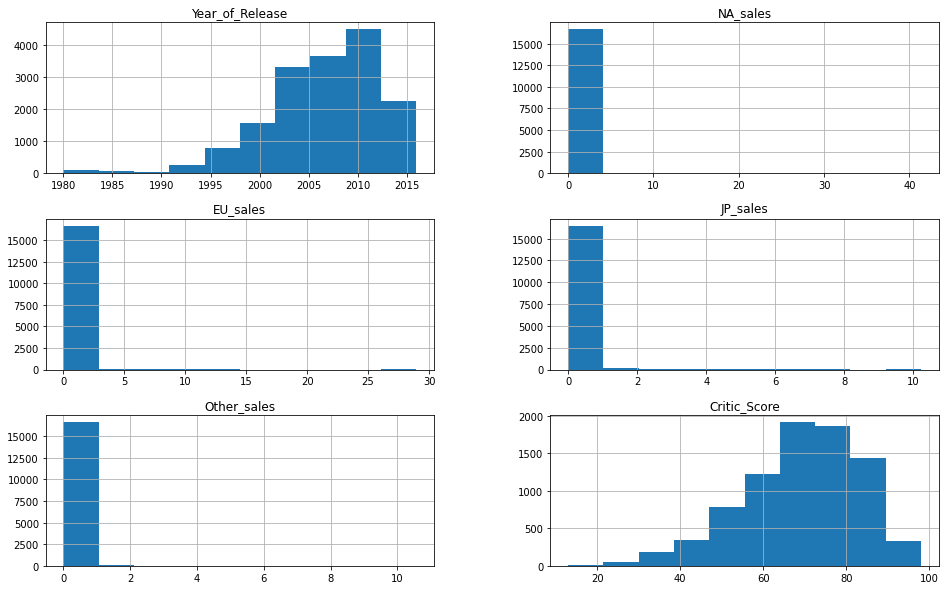

In [4]:
# построим общую гистограмму для всех столбцов таблицы (используем plt.show() для того, 
#             что бы не ввыводить на экран текстовую информацию перед таблицами)
data.hist(figsize=(16, 10))
plt.show()

По гистограммам на данный момент можно сказать:
- Основная часть игр реализована с 2002 по 2015 года;
- Продажи кол-ва копий: Северная Америка - до 4 млн, Европа - до 2,5 млн, Япония - до 1 млн, Остальные страны - до 1 млн;
- Оценки критиков игр в большинстве случаев весьма неплохие от 55 до 90, пик игр имеет оценку от 65 до 80. 

### Предобработка данных

**Создадим копию датафрейма**

In [5]:
# Для удобства работать будем в копии базы, что бы всегда можно что-то сравнить с оригиналом
copy_data = deepcopy(data)

**Заменим названия столбцов (приведем к нижнему регистру)**

In [6]:
# Приведем названия столбцов к общему виду
copy_data.columns = map(str.lower, data.columns)

In [7]:
# Посмотрим и сравним с оригиналом базы
display(copy_data.sample(4))
display(data.sample(4))

name platform  year_of_release  \
4633   Double Pack: Finding Nemo / The Incredibles       XB           2006.0   
8192                      Monster 4x4: Stunt Racer      Wii           2009.0   
11230                               Theme Hospital       PS           1998.0   
13972            Hunter x Hunter: Wonder Adventure      PSP           2012.0   

          genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
4633     Action      0.31      0.09      0.00         0.01           NaN   
8192     Racing      0.16      0.00      0.00         0.01           NaN   
11230  Strategy      0.03      0.02      0.03         0.01           NaN   
13972    Action      0.00      0.00      0.04         0.00           NaN   

      user_score rating  
4633         NaN    NaN  
8192         5.2      E  
11230        NaN    NaN  
13972        NaN    NaN

Name Platform  Year_of_Release   Genre  \
10453             The First Templar     X360           2011.0  Action   
9107   Scarface: The World is Yours      Wii           2007.0  Action   
3388                     Dead Space       PC           2008.0  Action   
10210                        Grease       DS           2010.0    Misc   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
10453      0.06      0.04       0.0         0.01          52.0        6.3   
9107       0.12      0.01       0.0         0.01          71.0        8.4   
3388       0.00      0.53       0.0         0.06          86.0          8   
10210      0.10      0.00       0.0         0.01           NaN        tbd   

      Rating  
10453      T  
9107       M  
3388       M  
10210   E10+

**Преобразуем данные в нужные типы и обработуем пропуски при необходимости**

In [8]:
# Посмотрим кол-во тех или иных значений в столбцах, отсортировав по возрастанию, для понимания дальнейшей обработки

# сделаем функцию для вывода уникальных значений
def unique_values(dataframe):
    for column in dataframe.columns:
        print('Значения столбца ', column, 'и кол-во уникальных значений', dataframe[column].nunique())
        print('')
        print(dataframe[column].value_counts(ascending=True, dropna=False))
        print('')

# Смотрим        
unique_values(copy_data)

Значения столбца  name и кол-во уникальных значений 11559

Naruto: Ultimate Ninja 3 (JP sales)       1
Klonoa Heroes: Densetsu no Star Medal     1
Bejeweled Blitz                           1
Gungrave: Overdose                        1
Lair                                      1
                                         ..
FIFA 14                                   9
Madden NFL 07                             9
LEGO Marvel Super Heroes                  9
Ratatouille                               9
Need for Speed: Most Wanted              12
Name: name, Length: 11560, dtype: int64

Значения столбца  platform и кол-во уникальных значений 31

PCFX       1
GG         1
TG16       2
3DO        3
SCD        6
WS         6
NG        12
GEN       29
DC        52
GB        98
NES       98
2600     133
WiiU     147
SAT      173
SNES     239
XOne     247
N64      319
PS4      392
PSV      430
3DS      520
GC       556
GBA      822
XB       824
PC       974
PS      1197
PSP     1209
X360    1262
Wii  

***Маленький подитог:***
- в названиях есть повторяющиеся наименования игр, посмотрим на них
- у нас представлено 31 платформа, из них преобладают PS2, DS, PS3, Wii, X360, PSP и PS (можно посмотреть расшифоровку наименования, для выявления неявных дубликатов и возможно сделать категоризацию)
- в 2006, 2007, 2008, 2009, 2010, 2011 выпущено больше 1000 игр
- всего 2 пропущенных значения, неявных дубликатов в жанрах не видно
- в продажах есть большое кол-во значений "0.00" - нужно или расширить кол-во знаков после запятой, или перевести из млн в тыс
- столбец оценки экспертов имеет тип данных float, а значения в столбце все целлочисленные - в дальнейшем при необходимости, можно поменять формат
- в столбце оценки пользователей есть одно нулевое значение (совсем плохая игра? или кто-то ошибся?), а так же 242 значения "tbd" - нужно разобраться
- можно детальнее посмотреть значения рейтингов, для понимания и обнаружения неявных дубликатов

In [9]:
# Посмотрим на повторяющиеся наименования игр на примере одной из них
copy_data.query('name == "Need for Speed: Most Wanted"').sort_values(by='platform')

name platform  year_of_release   genre  \
6410   Need for Speed: Most Wanted       DS           2005.0  Racing   
6473   Need for Speed: Most Wanted      GBA           2005.0  Racing   
3581   Need for Speed: Most Wanted       GC           2005.0  Racing   
5972   Need for Speed: Most Wanted       PC           2005.0  Racing   
11715  Need for Speed: Most Wanted       PC           2012.0  Racing   
253    Need for Speed: Most Wanted      PS2           2005.0  Racing   
523    Need for Speed: Most Wanted      PS3           2012.0  Racing   
2048   Need for Speed: Most Wanted      PSV           2012.0  Racing   
6273   Need for Speed: Most Wanted     WiiU           2013.0  Racing   
1190   Need for Speed: Most Wanted     X360           2012.0  Racing   
1591   Need for Speed: Most Wanted     X360           2005.0  Racing   
1998   Need for Speed: Most Wanted       XB           2005.0  Racing   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
6410       0.24      0.01      0.00         0.02          45.0        6.1   
6473       0.19      0.07      0.00         0.00           NaN        8.3   
3581       0.43      0.11      0.00         0.02          80.0        9.1   
5972       0.02      0.23      0.00         0.04          82.0        8.5   
11715      0.00      0.06      0.00         0.02          82.0        8.5   
253        2.03      1.79      0.08         0.47          82.0        9.1   
523        0.71      1.46      0.06         0.58           NaN        NaN   
2048       0.33      0.45      0.01         0.22           NaN        NaN   
6273       0.13      0.12      0.00         0.02           NaN        NaN   
1190       0.62      0.78      0.01         0.15          83.0        8.5   
1591       1.00      0.13      0.02         0.10          83.0        8.5   
1998       0.53      0.46      0.00         0.05          83.0        8.8   

      rating  
6410       E  
6473       E  
3581       T  
5972       T  
11715      T  
253        T  
523      NaN  
2048     NaN  
6273     NaN  
1190       T  
1591       T  
1998       T

Все в порядке: игра выпускается на разные платформы и в разные года, возможны переиздания игры.

К тому же метод `duplicated().sum()` на подтвердил, что дубликаты отсутсвуют

In [10]:
# для удобства переименуем игровые платформы

wrong = ['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX']
correct = ['Nintendo Wii', 'Nintendo NES', 'GB-60', 'Nintendo DS', 'Xbox 360', 'PlayStation 3', 'PlayStation 2',
           'Nintendo SNES',
           'Game Boy Advance', 'PlayStation 4', 'Nintendo 3DS', 'Nintendo 64', 'PlayStation', 'Xbox', 'Personal computer (PC)',
           'Atari 2600', 'PlayStation Portable', 'Xbox One', 'Nintendo Wii U', 'Nintendo GameCube', 'SEGA Retro Genesis',
           'Dendy Classic', 'PlayStation Vita', 'Sega Saturn', 'Sega CD', 'WonderSwan', 'NeoGeo', 'NEC TurboGrafx',
           'Panasonic 3DO', 'Game Gear', 'NEC PC-FX']

copy_data['platform'] = copy_data['platform'].replace(wrong, correct)
            
display(copy_data.sample(10))
print(copy_data['platform'].unique())

name                platform  \
6050                          James Bond 007: Legends                Xbox 360   
5216                                ESPN NFL Football                    Xbox   
13398                    Taiko no Tatsujin Portable 2    PlayStation Portable   
8319                       James Cameron's Dark Angel           PlayStation 2   
3039                                         MLB 2004           PlayStation 2   
14006                      Pia Carrot e Youkoso!! 2.5           Dendy Classic   
8945   The Wizard of Oz: Beyond The Yellow Brick Road             Nintendo DS   
5683                            Quiz Magic Academy DS             Nintendo DS   
15889                                 Lost: Via Domus  Personal computer (PC)   
16526                                      Dungeons 2           PlayStation 4   

       year_of_release         genre  na_sales  eu_sales  jp_sales  \
6050            2012.0       Shooter      0.13      0.13      0.00   
5216            2003.0        Sports      0.27      0.08      0.00   
13398           2006.0          Misc      0.00      0.00      0.05   
8319               NaN        Action      0.08      0.07      0.00   
3039            2003.0        Sports      0.32      0.25      0.00   
14006           2008.0     Adventure      0.00      0.00      0.04   
8945            2008.0  Role-Playing      0.13      0.00      0.00   
5683            2008.0          Misc      0.00      0.00      0.32   
15889           2008.0        Action      0.00      0.01      0.00   
16526           2016.0  Role-Playing      0.01      0.00      0.00   

       other_sales  critic_score user_score rating  
6050          0.03           NaN        NaN    NaN  
5216          0.01          91.0        8.9      E  
13398         0.00           NaN        NaN    NaN  
8319          0.02          48.0        6.5      T  
3039          0.08          61.0        7.9      E  
14006         0.00           NaN        NaN    NaN  
8945          0.01          68.0          6      E  
5683          0.00           NaN        NaN    NaN  
15889         0.00          52.0          6      T  
16526         0.00          61.0        7.9      T

['Nintendo Wii' 'Nintendo NES' 'GB-60' 'Nintendo DS' 'Xbox 360'
 'PlayStation 3' 'PlayStation 2' 'Nintendo SNES' 'Game Boy Advance'
 'PlayStation 4' 'Nintendo 3DS' 'Nintendo 64' 'PlayStation' 'Xbox'
 'Personal computer (PC)' 'Atari 2600' 'PlayStation Portable' 'Xbox One'
 'Nintendo Wii U' 'Nintendo GameCube' 'SEGA Retro Genesis' 'Dendy Classic'
 'PlayStation Vita' 'Sega Saturn' 'Sega CD' 'WonderSwan' 'NeoGeo'
 'NEC TurboGrafx' 'Panasonic 3DO' 'Game Gear' 'NEC PC-FX']


In [11]:
# добавим столбец с фирмами игровых платформ

# используем функцию и методи apply()
def maker_platform(row):
    if 'Nintendo' in row:
        return 'Nintendo'
    elif 'Xbox' in row:
        return 'Xbox'
    elif 'PlayStation' in row:
        return 'PlayStation'
    elif 'Personal computer' in row:
        return 'PC'
    elif 'Sega' in row:
        return 'Sega'
    elif 'NEC' in row:
        return 'NEC'
    return 'other'
    
copy_data['maker_platform'] = copy_data['platform'].apply(maker_platform)
# Смотрим
copy_data.sample(4)

name       platform  year_of_release  \
5836           Dai-2-Ji Super Robot Taisen OG  PlayStation 3           2012.0   
2808                         NCAA Football 07       Xbox 360           2006.0   
11064  Naruto RPG 3: Rejiuu vs Konoha Shoutai    Nintendo DS           2006.0   
14723                          Turn It Around    Nintendo DS           2006.0   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
5836       Strategy      0.00       0.0      0.30         0.00           NaN   
2808         Sports      0.67       0.0      0.00         0.06          79.0   
11064  Role-Playing      0.00       0.0      0.09         0.00           NaN   
14723        Action      0.03       0.0      0.00         0.00          39.0   

      user_score rating maker_platform  
5836         NaN    NaN    PlayStation  
2808         6.9      E           Xbox  
11064        NaN    NaN       Nintendo  
14723        4.5      E       Nintendo

Неявных дубликатов среди игровых платформ нет, добавили стобец по производителю

In [12]:
# Посмотрим на пропущенные значения в жанрах
copy_data[copy_data['genre'].isnull()]

name            platform  year_of_release genre  na_sales  eu_sales  \
659    NaN  SEGA Retro Genesis           1993.0   NaN      1.78      0.53   
14244  NaN  SEGA Retro Genesis           1993.0   NaN      0.00      0.00   

       jp_sales  other_sales  critic_score user_score rating maker_platform  
659        0.00         0.08           NaN        NaN    NaN          other  
14244      0.03         0.00           NaN        NaN    NaN          other

Пропущенные значения в жанре совпадают с пропущенными значениями в наименовании игры, такие данные мы никак не восстановим, поэтому удалим их из датафрейма, к тому же таких строк всего 2 и на выборку никак не повлияет

In [13]:
# Удаляем пропущенные значения 
copy_data = copy_data.dropna(subset = ['genre'])
# Проверяем
display(copy_data[copy_data['genre'].isnull()])
copy_data.info()

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating, maker_platform]
Index: []

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
 11  maker_platform   16713 non-null  object 
dtypes: float64(6), object(6)
memory usage: 1.7+ MB


In [14]:
# Переведем значение продаж -  миллионы проданных копий в тысячи проданных копий
copy_data.loc[:,'na_sales': 'other_sales'] = copy_data.loc[:,'na_sales': 'other_sales'] * 1000
# Проверяем
copy_data.head(5)

name      platform  year_of_release         genre  \
0                Wii Sports  Nintendo Wii           2006.0        Sports   
1         Super Mario Bros.  Nintendo NES           1985.0      Platform   
2            Mario Kart Wii  Nintendo Wii           2008.0        Racing   
3         Wii Sports Resort  Nintendo Wii           2009.0        Sports   
4  Pokemon Red/Pokemon Blue         GB-60           1996.0  Role-Playing   

   na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating  \
0   41360.0   28960.0    3770.0       8450.0          76.0          8      E   
1   29080.0    3580.0    6810.0        770.0           NaN        NaN    NaN   
2   15680.0   12760.0    3790.0       3290.0          82.0        8.3      E   
3   15610.0   10930.0    3280.0       2950.0          80.0          8      E   
4   11270.0    8890.0   10220.0       1000.0           NaN        NaN    NaN   

  maker_platform  
0       Nintendo  
1       Nintendo  
2       Nintendo  
3       Nintendo  
4          other

**Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберем это значение и решим, как его обработать**

Согласно  Википедии `https://en.wikipedia.org/wiki/To_be_announced` **'tbd'** означает, что ***рейтинг будет определен позднее***.

Для нашего исследования данная информация никакой роли не играет, с таким "рейтингом" анализ не провести, так что приравняем это значение к пропущенным значениям рейтинга (на данный момент заменять на какие-либо значения нет смысла, может только исказить общую картину)

In [15]:
# Кол-во таких значений
len(copy_data.query('user_score == "tbd"'))

2424

**ESRB (Entertainment Software Rating Board)** — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

У нас 8 категорий рейтинга: (посмотрим критерии `https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board`)
- **«AO»** («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое.
- **«RP»** («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу:
- **"K-A"** ("Kids to Adults")
- **«EC»** («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.
- **«E10+»** («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года.
- **«M»** («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.
- **«T»** («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
- **«E»** («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально "K-A" ("Kids to Adults")

Как видим категория "К-А" и "Е" - одно и тоже, объединим 

Пропущенные значения на данный момент заполнять не будем, мы не ESRB.

In [16]:
# Присвоим рейтингу К-А" значение рейтнига "Е" 
copy_data['rating'] = copy_data['rating'].replace('K-A', 'E')
# Проверим замену
copy_data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [17]:
# Посмотрим на оставшиеся пропуски
copy_data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
maker_platform        0
dtype: int64

У нас остались пропуски в 4 столбцах. Рассмотрим пропущенные значения в "годах"

In [18]:
# Посмотрим на такие столбцы
copy_data[copy_data['year_of_release'].isna()].head(10)

name          platform  \
183                              Madden NFL 2004     PlayStation 2   
377                             FIFA Soccer 2004     PlayStation 2   
456                   LEGO Batman: The Videogame      Nintendo Wii   
475                   wwe Smackdown vs. Raw 2006     PlayStation 2   
609                               Space Invaders        Atari 2600   
627                                    Rock Band          Xbox 360   
657     Frogger's Adventures: Temple of the Frog  Game Boy Advance   
678  LEGO Indiana Jones: The Original Adventures      Nintendo Wii   
719                               Call of Duty 3      Nintendo Wii   
805                                    Rock Band      Nintendo Wii   

     year_of_release      genre  na_sales  eu_sales  jp_sales  other_sales  \
183              NaN     Sports    4260.0     260.0      10.0        710.0   
377              NaN     Sports     590.0    2360.0      40.0        510.0   
456              NaN     Action    1800.0     970.0       0.0        290.0   
475              NaN   Fighting    1570.0    1020.0       0.0        410.0   
609              NaN    Shooter    2360.0     140.0       0.0         30.0   
627              NaN       Misc    1930.0     330.0       0.0        210.0   
657              NaN  Adventure    2150.0     180.0       0.0         70.0   
678              NaN     Action    1510.0     610.0       0.0        210.0   
719              NaN    Shooter    1170.0     840.0       0.0        230.0   
805              NaN       Misc    1330.0     560.0       0.0        200.0   

     critic_score user_score rating maker_platform  
183          94.0        8.5      E    PlayStation  
377          84.0        6.4      E    PlayStation  
456          74.0        7.9   E10+       Nintendo  
475           NaN        NaN    NaN    PlayStation  
609           NaN        NaN    NaN          other  
627          92.0        8.2      T           Xbox  
657          73.0        tbd      E          other  
678          78.0        6.6   E10+       Nintendo  
719          69.0        6.7      T       Nintendo  
805          80.0        6.3      T       Nintendo

Можно заметить, что в названиях некоторых игр есть год (характерно для жанра "спорт" перевыпуск игры) . Предположим, что это и есть год игры, а точнее выход игры обычно происходит на год раньше, то есть Madden NFL 2004	вышла в 2003 году.

In [19]:
# Посмотрим на игры, у кого в названии есть часть года ("20" - для игр после двухтысячного года,
# "от 83 по 99" - для тысяча девятьсот что-то там), а год реализации пропущен
games_years = ['83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94',
               '95', '96', '97', '98', '99'] # список годов, где цифра окончание тысяча девятьсот ХХ года (19хх)
# Данные года выносим в отдельный списко из-за того, что в имени игры тех годов будут указны 2 цифры ("Triple Play 99"),
# а для игр старше 2000 года, в названии будет полный год ("NBA Live 2003")
for i in games_years:
    x_games = copy_data.loc[(copy_data['year_of_release'].isnull()) &
                      ((copy_data['name'].str.contains('20')) | (copy_data['name'].str.contains(i)))]
display(x_games)
# И их кол-во, список названий
print('')
print('Кол-во:', len(x_games))
print('')
print('Наименования: ', x_games['name'].unique())
# data.loc[data[ 'название_игры' ] == 'wwe Smackdown vs. Raw 2006' , 'год_выпуска'] = 2006 
# Series.str.contains(pat, case=True, flags=0, na=None, regex=True)

name                platform  \
183                      Madden NFL 2004           PlayStation 2   
377                     FIFA Soccer 2004           PlayStation 2   
475           wwe Smackdown vs. Raw 2006           PlayStation 2   
1301                      Triple Play 99             PlayStation   
1650                 NASCAR Thunder 2003           PlayStation 2   
2492                  MLB SlugFest 20-03           PlayStation 2   
2572      PES 2009: Pro Evolution Soccer    PlayStation Portable   
3486                     Madden NFL 2002                    Xbox   
4775                    NFL GameDay 2003           PlayStation 2   
5156                       NBA Live 2003                    Xbox   
5336                  Tomb Raider (2013)  Personal computer (PC)   
5655              All-Star Baseball 2005           PlayStation 2   
5889                       NBA Live 2003       Nintendo GameCube   
6954                             Jet X20           PlayStation 2   
8918              All-Star Baseball 2005                    Xbox   
12046            Drake of the 99 Dragons                    Xbox   
13195                Tour de France 2011                Xbox 360   
13929                    Sega Rally 2006           PlayStation 2   
15953  PDC World Championship Darts 2008             Nintendo DS   
16079              Football Manager 2007                Xbox 360   
16373  PDC World Championship Darts 2008    PlayStation Portable   

       year_of_release     genre  na_sales  eu_sales  jp_sales  other_sales  \
183                NaN    Sports    4260.0     260.0      10.0        710.0   
377                NaN    Sports     590.0    2360.0      40.0        510.0   
475                NaN  Fighting    1570.0    1020.0       0.0        410.0   
1301               NaN    Sports     810.0     550.0       0.0        100.0   
1650               NaN    Racing     600.0     460.0       0.0        160.0   
2492               NaN    Sports     410.0     320.0       0.0        110.0   
2572               NaN    Sports      40.0     330.0     260.0        170.0   
3486               NaN    Sports     530.0      20.0       0.0         30.0   
4775               NaN    Sports     200.0     150.0       0.0         50.0   
5156               NaN    Sports     310.0      40.0       0.0         10.0   
5336               NaN    Action      60.0     250.0       0.0         40.0   
5655               NaN    Sports     160.0     120.0       0.0         40.0   
5889               NaN    Sports     230.0      60.0       0.0         10.0   
6954               NaN    Racing     110.0      90.0       0.0         30.0   
8918               NaN    Sports     110.0      30.0       0.0         10.0   
12046              NaN   Shooter      50.0      10.0       0.0          0.0   
13195              NaN    Racing       0.0      40.0       0.0         10.0   
13929              NaN    Racing       0.0       0.0      40.0          0.0   
15953              NaN    Sports      10.0       0.0       0.0          0.0   
16079              NaN    Sports       0.0      10.0       0.0          0.0   
16373              NaN    Sports      10.0       0.0       0.0          0.0   

       critic_score user_score rating maker_platform  
183            94.0        8.5      E    PlayStation  
377            84.0        6.4      E    PlayStation  
475             NaN        NaN    NaN    PlayStation  
1301            NaN        NaN    NaN    PlayStation  
1650           84.0        8.7      E    PlayStation  
2492           77.0        8.2      E    PlayStation  
2572            NaN        NaN    NaN    PlayStation  
3486           90.0        8.1      E           Xbox  
4775           60.0        tbd      E    PlayStation  
5156           82.0        8.8      E           Xbox  
5336           86.0        8.5      M             PC  
5655           72.0        8.6      E    PlayStation  
5889           82.0        8.2      E       Nintendo  
6954            NaN        NaN


Кол-во: 21

Наименования:  ['Madden NFL 2004' 'FIFA Soccer 2004' 'wwe Smackdown vs. Raw 2006'
 'Triple Play 99' 'NASCAR Thunder 2003' 'MLB SlugFest 20-03'
 'PES 2009: Pro Evolution Soccer' 'Madden NFL 2002' 'NFL GameDay 2003'
 'NBA Live 2003' 'Tomb Raider (2013)' 'All-Star Baseball 2005' 'Jet X20'
 'Drake of the 99 Dragons' 'Tour de France 2011' 'Sega Rally 2006'
 'PDC World Championship Darts 2008' 'Football Manager 2007']


И так: вышло 21 игра, но 'Jet X20' и 'Drake of the 99 Dragons' не подходит, то есть 19 игр, из них 1 игра 98 года: Triple Play 99

In [20]:
# Произведем замену в пропущенном значение столбца "год выпуска игры" на год игры минус 1,
# кроме Tomb Raider (2013) - в 2013 выпустили
copy_data.loc[(copy_data['name'] == 'Madden NFL 2004') & (copy_data['year_of_release'].isnull() == True),
              'year_of_release'] = 2003
copy_data.loc[(copy_data['name'] == 'FIFA Soccer 2004') & (copy_data['year_of_release'].isnull() == True),
              'year_of_release'] = 2003
copy_data.loc[(copy_data['name'] == 'wwe Smackdown vs. Raw 2006') & (copy_data['year_of_release'].isnull() == True),
              'year_of_release'] = 2005
copy_data.loc[(copy_data['name'] == 'Triple Play 99') & (copy_data['year_of_release'].isnull() == True),
              'year_of_release'] = 1998
copy_data.loc[(copy_data['name'] == 'NASCAR Thunder 2003') & (copy_data['year_of_release'].isnull() == True),
              'year_of_release'] = 2002
copy_data.loc[(copy_data['name'] == 'MLB SlugFest 20-03') & (copy_data['year_of_release'].isnull() == True),
              'year_of_release'] = 2002
copy_data.loc[(copy_data['name'] == 'PES 2009: Pro Evolution Soccer') & (copy_data['year_of_release'].isnull() == True),
              'year_of_release'] = 2008
copy_data.loc[(copy_data['name'] == 'Madden NFL 2002') & (copy_data['year_of_release'].isnull() == True),
              'year_of_release'] = 2001
copy_data.loc[(copy_data['name'] == 'NFL GameDay 2003') & (copy_data['year_of_release'].isnull() == True),
              'year_of_release'] = 2002
copy_data.loc[(copy_data['name'] == 'NBA Live 2003') & (copy_data['year_of_release'].isnull() == True),
              'year_of_release'] = 2002
copy_data.loc[(copy_data['name'] == 'Tomb Raider (2013)') & (copy_data['year_of_release'].isnull() == True),
              'year_of_release'] = 2013
copy_data.loc[(copy_data['name'] == 'All-Star Baseball 2005') & (copy_data['year_of_release'].isnull() == True),
              'year_of_release'] = 2004
copy_data.loc[(copy_data['name'] == 'Tour de France 2011') & (copy_data['year_of_release'].isnull() == True),
              'year_of_release'] = 2010
copy_data.loc[(copy_data['name'] == 'Sega Rally 2006') & (copy_data['year_of_release'].isnull() == True),
              'year_of_release'] = 2005
copy_data.loc[(copy_data['name'] == 'PDC World Championship Darts 2008') & (copy_data['year_of_release'].isnull() == True),
              'year_of_release'] = 2007
copy_data.loc[(copy_data['name'] == 'Football Manager 2007') & (copy_data['year_of_release'].isnull() == True),
              'year_of_release'] = 2006

# Смотрим, что получилось
print('Кол-во пропущенных значений в столбце "года релиза":', copy_data['year_of_release'].isna().sum())
display(copy_data.loc[(copy_data['year_of_release'].isnull()) &
                      ((copy_data['name'].str.contains('20')) | (copy_data['name'].str.contains(i)))])

Кол-во пропущенных значений в столбце "года релиза": 250


name       platform  year_of_release    genre  \
6954                   Jet X20  PlayStation 2              NaN   Racing   
12046  Drake of the 99 Dragons           Xbox              NaN  Shooter   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
6954      110.0      90.0       0.0         30.0           NaN        NaN   
12046      50.0      10.0       0.0          0.0          22.0        1.8   

      rating maker_platform  
6954     NaN    PlayStation  
12046      T           Xbox

In [21]:
# Посмотрим на процентный остаток значений
'{:.2%}'.format((copy_data[copy_data['year_of_release'].isna()].shape[0]/copy_data['year_of_release'].shape[0]))

'1.50%'

1,5% процента пропущенных значений от общего кол-ва: можно удалить, такое кол-во данных на выбору не повлияет.

In [22]:
# Удаляем пропущенные значения 
copy_data = copy_data.dropna(subset = ['year_of_release'])
# Проверяем
print(copy_data.isnull().sum())
print('')
print(copy_data.info())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8467
user_score         6611
rating             6683
maker_platform        0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16463 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16463 non-null  object 
 1   platform         16463 non-null  object 
 2   year_of_release  16463 non-null  float64
 3   genre            16463 non-null  object 
 4   na_sales         16463 non-null  float64
 5   eu_sales         16463 non-null  float64
 6   jp_sales         16463 non-null  float64
 7   other_sales      16463 non-null  float64
 8   critic_score     7996 non-null   float64
 9   user_score       9852 non-null   object 
 10  rating           9780 non-null  

Пропущенные значения в "critic_score", "user_score", "rating" - заменять не будем, нам так проще проводить дальнейший анализ, к тому же оценки рейтинг носят индивидуальный характер.

**Преобразуем данные в нужные типы**

In [23]:
# Переводим значения столбца "user_score" в вещественный тип float, 
# с применением errors='coerce', для замены некорректных значений на NaN (в нашем случае будем замена аббревиатуры 'tbd' на NaN)
copy_data['user_score'] = pd.to_numeric(copy_data['user_score'], errors='coerce')

# Год выпуска - целое число
copy_data['year_of_release'] = copy_data['year_of_release'].astype(int)

# Тип данных в "оценке критика" оставим таким же, но приведем к десятичному формату, для удобного сравнения с оценками игроков.
copy_data['critic_score'] = copy_data['critic_score'] / 10

# Смортим
print(copy_data.dtypes)
display(copy_data.sample(5))

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
maker_platform      object
dtype: object


name       platform  \
2103                             Zoo Tycoon DS    Nintendo DS   
9887                         Tales of Berseria  PlayStation 3   
2007                      Super Princess Peach    Nintendo DS   
9116                      Active Life Explorer   Nintendo Wii   
11229  The Incredibles: Rise of the Underminer           Xbox   

       year_of_release         genre  na_sales  eu_sales  jp_sales  \
2103              2005      Strategy     860.0      30.0      10.0   
9887              2016  Role-Playing       0.0       0.0     120.0   
2007              2005      Platform     700.0      50.0     210.0   
9116              2010        Sports     130.0       0.0       0.0   
11229             2005        Action      60.0      20.0       0.0   

       other_sales  critic_score  user_score rating maker_platform  
2103          80.0           4.4         6.6      E       Nintendo  
9887           0.0           NaN         NaN    NaN    PlayStation  
2007          70.0           7.5         7.6      E       Nintendo  
9116          10.0           NaN         NaN      E       Nintendo  
11229          0.0           6.3         NaN   E10+           Xbox

**Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.**

In [24]:
# Создадим столбец "total_sales"
copy_data['total_sales'] = (copy_data['na_sales'] + copy_data['eu_sales'] + copy_data['jp_sales'] + copy_data['other_sales'])
# приветсвуем еще один столбец в нашем датафрейме
copy_data.head()

name      platform  year_of_release         genre  \
0                Wii Sports  Nintendo Wii             2006        Sports   
1         Super Mario Bros.  Nintendo NES             1985      Platform   
2            Mario Kart Wii  Nintendo Wii             2008        Racing   
3         Wii Sports Resort  Nintendo Wii             2009        Sports   
4  Pokemon Red/Pokemon Blue         GB-60             1996  Role-Playing   

   na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0   41360.0   28960.0    3770.0       8450.0           7.6         8.0      E   
1   29080.0    3580.0    6810.0        770.0           NaN         NaN    NaN   
2   15680.0   12760.0    3790.0       3290.0           8.2         8.3      E   
3   15610.0   10930.0    3280.0       2950.0           8.0         8.0      E   
4   11270.0    8890.0   10220.0       1000.0           NaN         NaN    NaN   

  maker_platform  total_sales  
0       Nintendo      82540.0  
1       Nintendo      40240.0  
2       Nintendo      35520.0  
3       Nintendo      32770.0  
4          other      31380.0

***Итак:***
- Актуаплизировали название столбцов;
- Типы данных заменили на предпочтительные для дальнейшей работы;
- Изабвились от неявных дубликатов, к примеру в столбце рейтинга они возникли из-за того, что рейтинг "К-А" был присвоин играм до того, как произошло объединение рейтингов с "Е";
- Заполнили пропущенные значения: пропуски могли возникнуть из-за того, что при заполнении данных об игре забыли указать данные (в случае с наименованием игры) или, если рассматривать столбец даты релиза, точная дата выхода игры для определенной платформы была не известна, а так же никто не исключает технические ошибки;
- Разобрались с аббревиатурой 'tbd' в столбце с оценкой пользователей и заменили значения на пропуски;
- Удалили из нашего датафрейма 2 строки неподлежащие восстановлению и 1,5% строк с неопределенной датой;
- Посчитали суммарные продажи.

### Исследовательский анализ данных

**Сколько игр выпускалось в разные годы.**

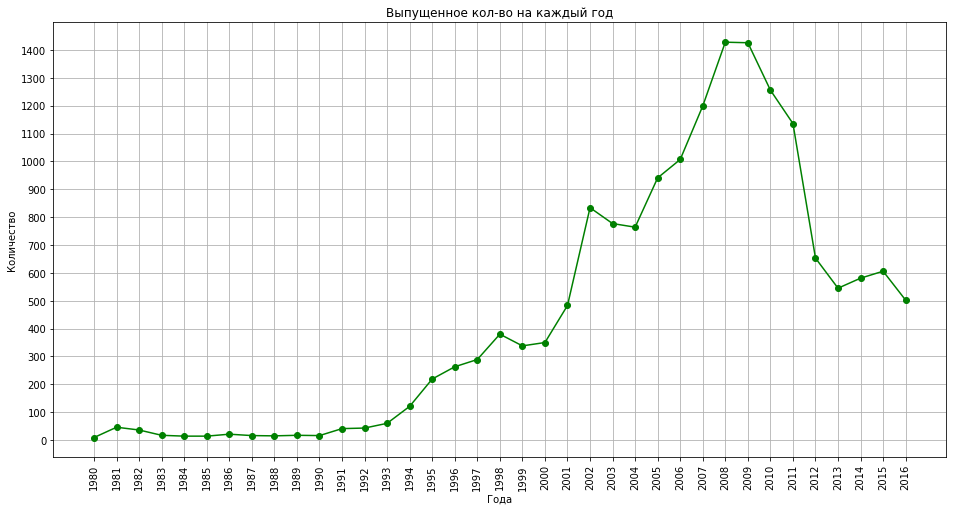

In [25]:
# Посмотрим на количественное сотношение игр на каждый год
copy_data.pivot_table(index='year_of_release', values='name', 
                      aggfunc='count', dropna=False).plot(grid=True, style='o-', figsize=(16, 8), color='green', legend=False)
plt.title('Выпущенное кол-во на каждый год')
plt.xlabel('Года')
plt.xticks(ticks=np.arange(1980,2017,1), rotation=90)
plt.yticks(ticks=np.arange(0,1500,100))
plt.ylabel('Количество')
plt.show()

count    16463.000000
mean      2006.483873
std          5.873693
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64


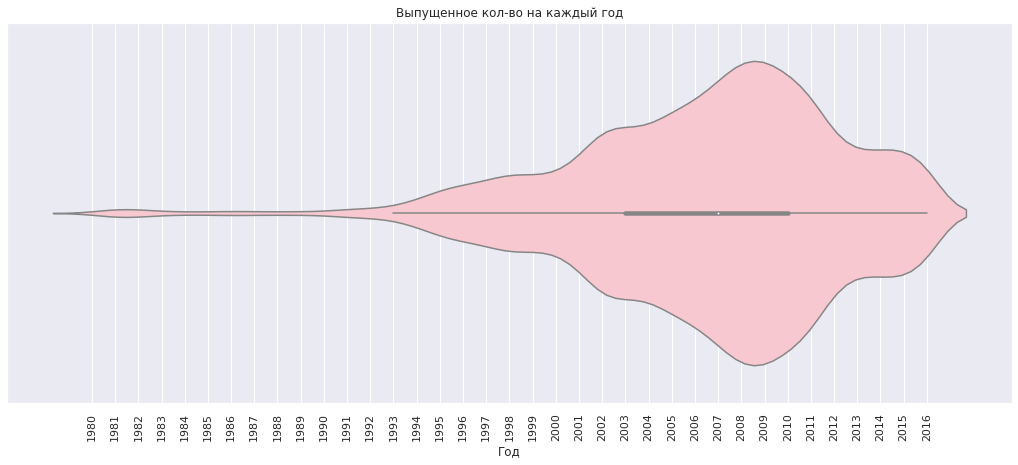

In [26]:
# Посмотрим на статистические данные столбца, которые дают представление о распределение значений
print(copy_data['year_of_release'].describe())

# Построим график типа "виолончельный ключ", на котором мы видим и гисстограмное распределение и диапозон размаха
sns.set(rc={'figure.figsize':(18,7)})
sns.violinplot(data=copy_data, x='year_of_release', ec='black', color='pink')
plt.title('Выпущенное кол-во на каждый год')
plt.xlabel('Год')
plt.xticks(ticks=np.arange(1980,2017,1), rotation=90)
plt.show()

- Если посмотреть на график, то видно, что до 1993 года выпускалось в год менее 100 игр, что в целом нам и подтверждаем и гисстограмное распределение и график размаха: эти игры единичны, в дальнейшем можем принять их за аномалии, на исследование их отсутсвие никак не повлияет.
- Основной диапозон выпуска игр приходится с 2001 года по 2016 ==> стабильно выпускалось от 500 игр в год.
- Самое большое кол-во игр в год выпускалось с 2002 года по 2012, что близко к левой и правой квантилям, со значениями 2003 и 2010 год соответсвенно.
- Пик реализации игр с 2008 по 2009 год.
- Среднее значение и медиана близятся друг к другу.

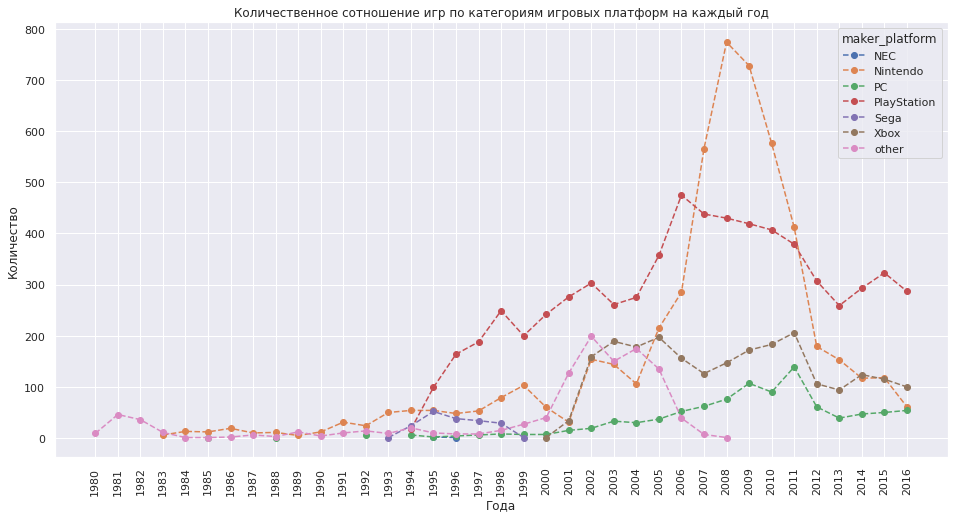

In [27]:
# Посмотрим на количественное сотношение игр по производителям (категории игровых платформ) на каждый год
copy_data.pivot_table(index='year_of_release', columns='maker_platform', values='name', 
                      aggfunc='count', dropna=False).plot(grid=True, linestyle='--', style='-o', figsize=(16, 8))
plt.title('Количественное сотношение игр по категориям игровых платформ на каждый год')
plt.xlabel('Года')
plt.xticks(ticks=np.arange(1980,2017,1), rotation=90)
plt.ylabel('Количество')
plt.show()

Для детальности посмотрим реализацию игр взависимости от платформы на каждый период времени:
 - График до 1993 подтверждает общую картину, игр выпускалось мало и преимущестенно на Nintendo или приставки из категории "другие", которые перестали быть актуальными к 2008 году (сейчас я бы назвал категорию "другие" - "ретро", приставки для ценителей);
 - Рынок ПК игр представлен весьма скудно, но появление и продажа игр на эту платформу вносит свою долю к периоду "основному диапозону выпуска игр";
 - Основной выпуск игр идет на PlayStation и Nintendo. Игры для PlayStation хорошо выпускались с 1999 года по 2016, а у игр был очень резкий старт с 2005 до 2008 года, и такое же резкое падение с 2008 по 2014 года.
 - Игры на Хbox появились с 2000 годов, и равномерно выпускаются от 100 до 200 игр в год.
 - Выпуск игр для Сеги был не долгим, с 93 по 99 год, но зато какие это были игры
 
**Для дальнейшего анализа можно выделить игры, выпущенные с 2002 года по 2015 год:**

- "Ретро" приставки нам не особо интересны - малая покупательная способность, так игры, выпущенные на Segy, в дальнейшее распределения не попадут;
- появление Xbox и рост PC игр, которые равномерно выпускались в этот период времени;
- равномерный ежегодный выпуск игр для PlayStation;
- в данный период для Nintendo выпускалось как малый, так и колосальный объем игр;
- самое большое кол-во выпущенных игр для разных платформ.

*Можно было взять и по 2012 год, из-за общего падения выпуска игр в 2013-14, но стабильные показатели выпуска игр для PlayStation, подъем общего выпуска в 2015г, и резкий спад выпуска игр для Nintendo, вносят свои коррективы*

**Продажи по платформам.**

***Выберем платформы с наибольшими суммарными продажами и построим распределение по годам, выясним за какой характерный срок появляются новые и исчезают старые платформы?***

In [28]:
# Посмотрим на распределение суммарных продаж игр на каждую платформу по сводной таблице
# Сводную таблицу формируем по платформе со значениями суммы общих продаж
display(copy_data.pivot_table(index='platform', values='total_sales',
                                           aggfunc='sum').sort_values(by='total_sales', ascending=False))

total_sales
platform                           
PlayStation 2             1248120.0
Xbox 360                   961300.0
PlayStation 3              931340.0
Nintendo Wii               891180.0
Nintendo DS                802790.0
PlayStation                729040.0
PlayStation 4              314140.0
Game Boy Advance           312880.0
PlayStation Portable       290340.0
Nintendo 3DS               257810.0
Personal computer (PC)     256110.0
GB-60                      254430.0
Xbox                       252660.0
Nintendo NES               251050.0
Nintendo 64                218010.0
Nintendo SNES              200040.0
Nintendo GameCube          197030.0
Xbox One                   159320.0
Atari 2600                  86480.0
Nintendo Wii U              82190.0
PlayStation Vita            53810.0
Sega Saturn                 33590.0
SEGA Retro Genesis          28350.0
Dendy Classic               15950.0
Sega CD                      1860.0
NeoGeo                       1440.0
WonderSwan                   1420.0
NEC TurboGrafx                160.0
Panasonic 3DO                 100.0
Game Gear                      40.0
NEC PC-FX                      30.0

In [29]:
# Посмотрим на суммарные продажи игр в зависимости от игровой платформы
fig = px.bar(copy_data, x='platform', y='total_sales', hover_data=['year_of_release'],
    title='Распределение выпуска игр для каждой игровой платформы по годам', color='year_of_release', 
    labels={'platform':'Игровая платформа', 'year_of_release':'Год выпуска игры',
            'total_sales':'Кол-во продаж, тыс шт'})
fig.show()

По сводной таблице и графику мы можем выделить 5 игровых платформ по суммарным продажам игр для них:
-   PlayStation 2
-   Xbox 360
-	PlayStation 3
-	Nintendo Wii
-	Nintendo DS
-	PlayStation

Данные платформы более чем в 2 раза опережают своих конкурентов.

In [30]:
# Выделим эти 5 игровых приставок
print('Топ-5:', list(copy_data.pivot_table(index='platform', values='total_sales',
                                           aggfunc='sum').sort_values(by='total_sales', ascending=False).index[:5]))

Топ-5: ['PlayStation 2', 'Xbox 360', 'PlayStation 3', 'Nintendo Wii', 'Nintendo DS']


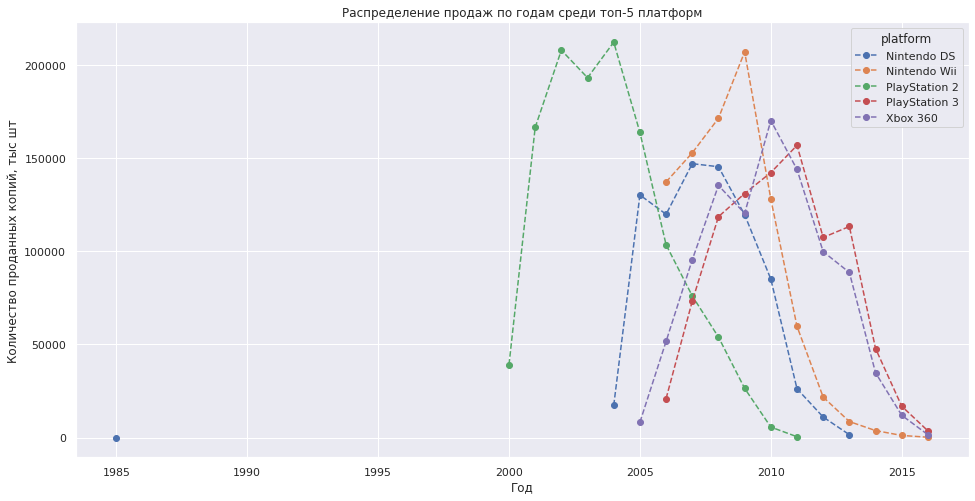

In [31]:
# Распределение продаж по годам среди топ-5 платформ
copy_data.query("platform == ['PlayStation 2', 'Xbox 360', 'PlayStation 3', 'Nintendo Wii', 'Nintendo DS']").pivot_table(index='year_of_release',
            columns='platform', values='total_sales',
            aggfunc='sum').plot(grid=True, linestyle='--', style='-o', figsize=(16, 8))
plt.title('Распределение продаж по годам среди топ-5 платформ')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий, тыс шт')
plt.show()

График нас показывает, что для игровой консоли Nintendo DS (год выпуска которой - 2004 `https://ru.wikipedia.org/wiki/Nintendo_DS`) есть игра, для которой указан некорректно год выпуска игры. Исправим.

In [32]:
# Посмотрим что за чудо
copy_data.query('platform == "Nintendo DS" and year_of_release < 2003')

name     platform  year_of_release  \
15957  Strongest Tokyo University Shogi DS  Nintendo DS             1985   

        genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
15957  Action       0.0       0.0      20.0          0.0           NaN   

       user_score rating maker_platform  total_sales  
15957         NaN    NaN       Nintendo         20.0

In [33]:
# Проверим, нет ли еще где игры "Strongest Tokyo University Shogi DS"
copy_data.query('name == "Strongest Tokyo University Shogi DS"')

name     platform  year_of_release  \
15957  Strongest Tokyo University Shogi DS  Nintendo DS             1985   

        genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
15957  Action       0.0       0.0      20.0          0.0           NaN   

       user_score rating maker_platform  total_sales  
15957         NaN    NaN       Nintendo         20.0

In [34]:
# Исправим дату реализации для игры "Strongest Tokyo University Shogi DS" 
# на 2007 год `https://www.suruga-ya.com/en/product/176000588`
copy_data.loc[(copy_data['name'] == 'Strongest Tokyo University Shogi DS'), 'year_of_release'] = 2007
# проверим
copy_data.query('name == "Strongest Tokyo University Shogi DS"')

name     platform  year_of_release  \
15957  Strongest Tokyo University Shogi DS  Nintendo DS             2007   

        genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
15957  Action       0.0       0.0      20.0          0.0           NaN   

       user_score rating maker_platform  total_sales  
15957         NaN    NaN       Nintendo         20.0

Посмотрим на график с исправленными значениями и добавим для анализа от каждого производителя еще по одной, более новой, игровой платформе: PlayStation 4, Nintendo Wii U, Xbox One.

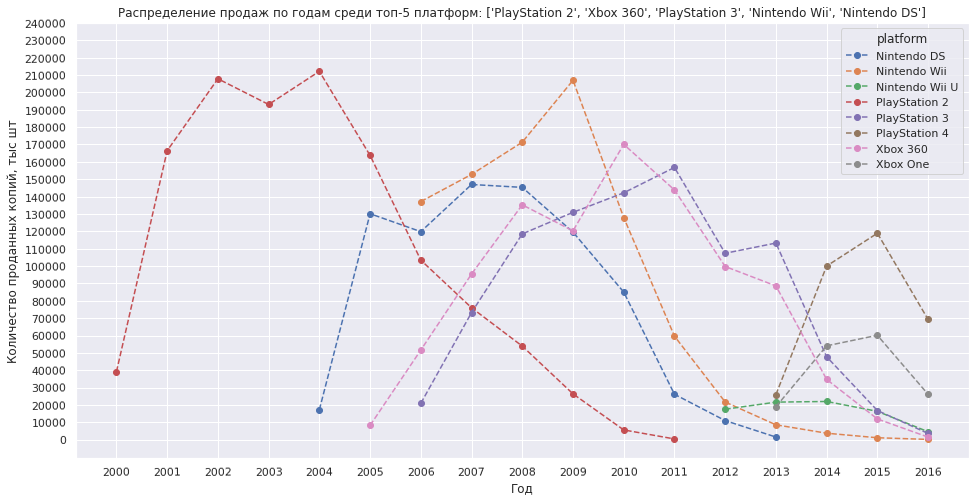

In [35]:
# Посмотрим на график с исправленными значениями
list_platform = ['PlayStation 2', 'Xbox 360', 'PlayStation 3', 'Nintendo Wii', 'Nintendo DS', 'PlayStation 4', 'Nintendo Wii U', 'Xbox One']
copy_data.query("platform == @list_platform").pivot_table(index='year_of_release',
            columns='platform', values='total_sales',
            aggfunc='sum').plot(grid=True, linestyle='--', style='-o', figsize=(16, 8))
plt.title("Распределение продаж по годам среди топ-5 платформ: ['PlayStation 2', 'Xbox 360', 'PlayStation 3', 'Nintendo Wii', 'Nintendo DS']")
plt.xlabel('Год')
plt.xticks(ticks=np.arange(2000,2017,1), rotation=1)
plt.yticks(ticks=np.arange(0,250000,10000), rotation=1)
plt.ylabel('Количество проданных копий, тыс шт')
plt.show()

Мы видим, что топ-5 платформ активно начинали: за год, после выходи на рынок, продажи игр взлетали вверх. 

Хочется выделить PlayStation 2: всего за два года (с 2000 по 2002) суммарные продажи игр взлетели с 40 млн копий до 208 млн копий, начиная  с 2003 года идет уверенный спад продажи игр, в год по минус 50 млн копий. Таким образом в 2006 году на рынок выходит преемник PlayStation 3, и в 2007 году перехватывает эстафету (показатели продаж игр для каждой платформы примерно одинаковы и составляют около 70 млн. копий), но таких потрясающих показателей, как у предшественника, показать не может: с 2008 по 2011 год суммарная прибавка всего 40 млн. копий (со 120 до 160 млн), дальше уверенный спад. Поэтому в 2013 году выходит новая версия PlayStation 4, которая так же активно начинает показавать продажи. В рассчет не будем брать данные 2016 года, так как они не полные.

Таким образом, на примере семейства PlayStation, можно сделать вывод, что срок жизни платформы где-то 5-6 лет, из которых года 4 хорошие показатели продаж, оставшиеся 2 года - остаточный принцип, дальше нужны новые решения, новые технологии.

Семейство Nintendo: 

Nintendo DS - актуальна была 7 лет, из которых 4 года неплохие продажи, а дальше как и у всех, при этом с 2004 по 2005 смогла реализовать 110 млн копий, в 2006 продажи упали на 10 млн копий, к 2007 году отыгралась до 150 млн штук в год и смогла продержать такие показатели до 2008.

А вот Nintendo Wii только в год релиза показала показатели в 140 млн копий, лучше ни у кого нет, с 2006 по 2009 поднимает продажи до 207 млн (рекорд PS2 не побит), дальше очень стремительное падение продаж. Преемник Nintendo Wii U (в топе нет) стабильные продажи по 20 млн копий в год - очень плохо.

Цикл жизни Nintendo +- 5 лет.

Показатели Xbox 360 очень похожи на PlayStation 3. Только актульность платформы можно выделить примерно в 8-10 лет. Xbox One, на данный момент, не смогла перехватить так же уверенно эстафету, как PlayStation 4.

По всем платформам наблюдается тенденция резких стартов продаж, затем паение после выхода консоли нового поколения, но вместе с этим выгода купить старую модель плюс поддержка старых моделей разработчиками помогает добиться плавности спада продаж.

***Для ответа на вопрос "За какой характерный срок появляются новые и исчезают старые платформы?", а точнее для подтверждения вышеописанного срока посмотрим на дополнительный график актуальных игровых платформ, начиная с 6 места топ-консолей и вспомним ранее рассчитаное соотношение производителей платформ.***

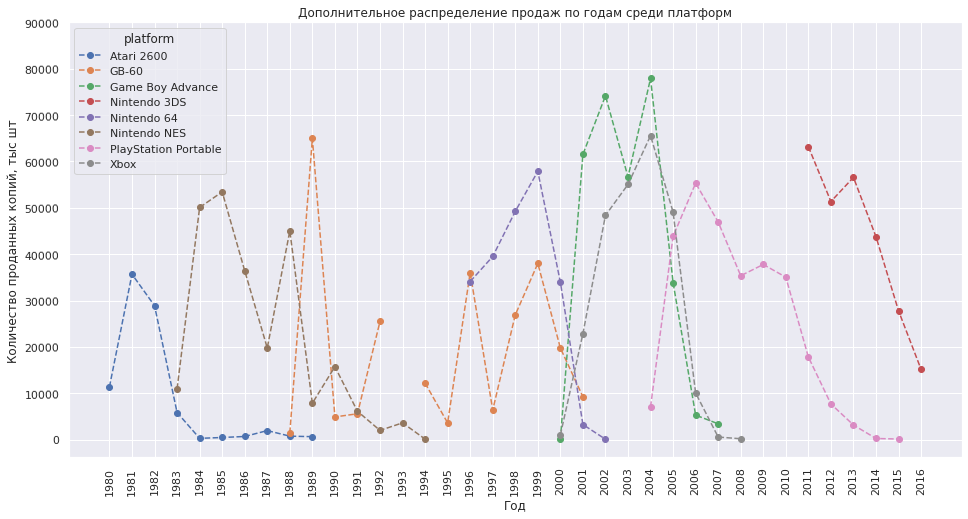

In [36]:
# Построим график

list_platform = ['Game Boy Advance', 'PlayStation Portable', 'Nintendo 3DS', 'GB-60', 'Xbox', 'Nintendo NES', 'Nintendo 64', 'Atari 2600']
copy_data.query("platform == @list_platform").pivot_table(index='year_of_release',
            columns='platform', values='total_sales',
            aggfunc='sum').plot(grid=True, linestyle='--', style='-o', figsize=(16, 8))
plt.title("Дополнительное распределение продаж по годам среди платформ")
plt.xlabel('Год')
plt.xticks(ticks=np.arange(1980,2017,1), rotation=90)
plt.yticks(ticks=np.arange(0,100000,10000), rotation=1)
plt.ylabel('Количество проданных копий, тыс шт')
plt.show()

Персональный компьютер рассматривать мы не будем в связи с тем, что компоненты на него постоянно обновляются и, как таковой, смены поколения нет.

Первое поколение Xbox было актуально 6-7 лет, что меньше, чем более актуальные модели этого семейства.

Консоли из семейства Nintendo подтверждают свой жизненный цикл в +- 5 лет.

Портативные консоли ('Game Boy Advance', 'PlayStation Portable', 'GB-60') - в свое время показавали неплохие показатели, но на данный момент стали совсем не актуальными.

***Подытожить можно так: новые консоли появляются в течение 5-6 лет, а актуальность консолей в диапозоне от 5 до 10 лет, в зависимости от производителя (Nintendo ~ 5 лет, Xbox ~ 8-10, PlayStation ~ 6 лет).***

**Определение актуального периода. Основной фактор — эти данные помогут построить прогноз на 2017 год.**


*Ранее вы выделили игры, выпущенные с 2002 года по 2015 год. Ввиду новых полученных данных изменим это период на:*

**c 2009 по 2015 года**
- в 2008 году прекращает свою жизнь консоль Xbox, остаются только актуальные версии Xbox One и Xbox 360, которые показывают равномерные продажи
- в этот период идет смена поколений PlayStation на 3 и 4 серию, и PlayStation показывает равномерный выпуск игр в эти года
- С 2008 года начинается спад игр для приставок Nintendo и к 2012 году показатели сравниваются с показателями Xbox
- рост числа игр для персональных компьютеров
- прекращение эры "ретро" консолей
- спад и прекращение выпуска игр для портативных консолей (хотя доля рынка еще насыщена: PlayStation Portable и PlayStation Vita, Nintendo DS и Nintendo 3DS, Nintendo Wii U) 

In [37]:
# Уменьшаем датафрейм до актуального периода
copy_data = copy_data.query('2009 <= year_of_release <= 2015')
copy_data['year_of_release'].describe().round(2)

count    6203.00
mean     2011.29
std         1.98
min      2009.00
25%      2010.00
50%      2011.00
75%      2013.00
max      2015.00
Name: year_of_release, dtype: float64

**Определим платформы, которые лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.**

In [38]:
# Посмотрим на распределение
display(copy_data.pivot_table(index='platform', values='total_sales',
            aggfunc='sum').sort_values(by='total_sales', ascending=False))

total_sales
platform                           
PlayStation 3              715070.0
Xbox 360                   669230.0
Nintendo Wii               429760.0
PlayStation 4              244890.0
Nintendo DS                243290.0
Nintendo 3DS               242670.0
Personal computer (PC)     133970.0
Xbox One                   133170.0
PlayStation Portable       101830.0
Nintendo Wii U              77590.0
PlayStation Vita            49560.0
PlayStation 2               32490.0

In [39]:
# На график
fig = px.bar(copy_data, x='platform', y='total_sales',
    hover_data=['year_of_release'], title='Соотношение игровых платформ по продажам', color='total_sales', 
    labels={'platform':'Игровая платформа', 'year_of_release':'Год выпуска игры',
            'total_sales':'Кол-во продаж, тыс шт'})
fig.show()

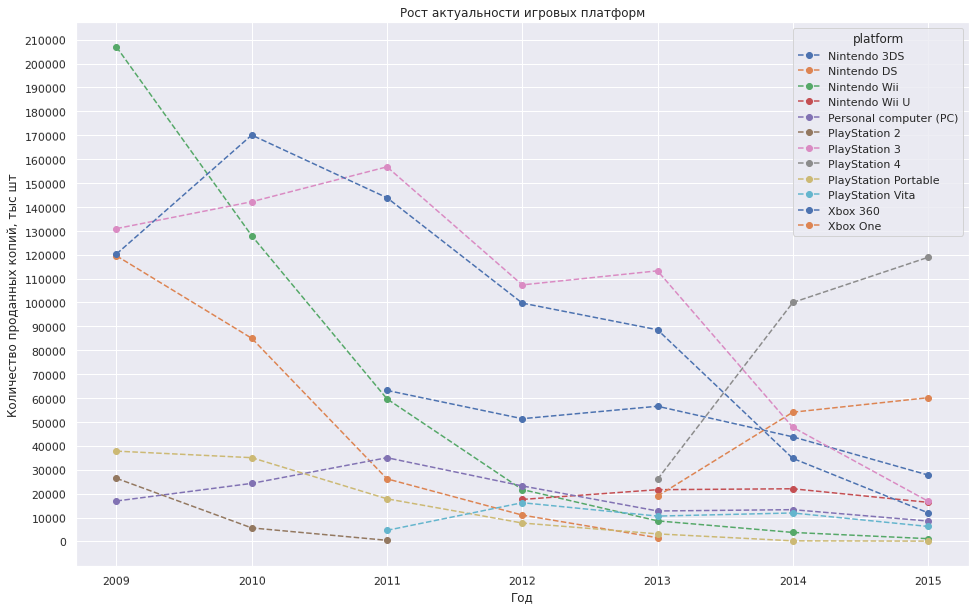

In [40]:
copy_data.pivot_table(index='year_of_release',
            columns='platform', values='total_sales',
            aggfunc='sum').plot(grid=True, linestyle='--', style='-o', figsize=(16, 10))
plt.title("Рост актуальности игровых платформ")
plt.xlabel('Год')
plt.xticks(ticks=np.arange(2009,2016,1), rotation=1)
plt.yticks(ticks=np.arange(0,220000,10000), rotation=1)
plt.ylabel('Количество проданных копий, тыс шт')
plt.show()

С помощью столбчатого графика видим, что в нашем актуальном периоде, 2009 - 2015 года, больше всего выпущено и продано игр для платформ PlayStation 3, Xbox 360 и Nintendo Wii, при это продажи для Playstion на ~ 65% больше, чем для Nintendo. Но такие результаты из-за того, что основной выпуск и продажа игр были совершены в начале нашего периода, до 2013 года, пока не вышли на рынок новые модели игровых платформ. 

По линейному графику отлично заметно, что у Nintendo Wii в 2009 году были лучшая реализация игр, по сравнению с конкурентами, в 210 млн копий, ближайший соперник PlayStation 3 отставал на 80 млн копий, но при этом в 2011 году у PS3 было продано 155 млн копий (за 2 года продажи увеличили на 30 млн копий в год), а у Nintendo Wii выпуск и продажи этих игр упали до 60 млн копий, а дальше только хуже, ежегодный результат спускался по наклоннной, в 2010 году - 10 млн копий, а в 2015 году - приставка "умерла".

Похожая история и с Nintendo DS, только в 2009 году реализовано было 120 млн копий, в 2011 - 28 млн, в 2013 году игровая консоль перестала быть актуальной.

По такому же принципу, но с куда малыми показателями выпуска и продаж игр, "погибли" PlayStation 2 и PlayStation Portable. Для последней портативной консоли от PS возможными причинами стали мобильные игры и развитие мобильных технологий. Хотя на Nintendo 3DS не сильно сказалось.

Таким образом, можно сказать, что все приставки, которые были на рынке в 2009 - 2010 годах к 2014-1015 году, растеряли свой потенциал (что и доказывает "жизненный цикл" в 5-6 лет), и лидеры продаж, что PlayStation 3, что Xbox 360 (история продаж которого очень похожа на PS 3) в 2015 году показывают реализацию меньше 20 млн копий по остаточному принципу.

Персональные компьютеры: в целом небольшие, но стабильные результаты, видимо игровые производители не делали никогда ставку на ПК: с 2009 года (18млн копий) подняли продажи до 34 млн копий (в 2011 году), и плавно опустили до 10 млн к 2015 году.

Вышедшие на замену приставки PlayStation Vita в 2011 году и Nintendo Wii U в 2012 году каких-либо результатов не показали, но держались довольно стабильно, продажи в пике не превышали 23 млн копий, и к 2015 году имееют те же продажи, что и на старте выпуска.

Осталось рассмотреть новичков: Nintendo 3DS высот предшественника достичь не смогла, на выходе 63 млн копий, и это ее личный рекорд, дальше спуск до 52 млн, подъем к 58 млн в 2013 году, и затем спуск до 28 млн к 2015 году. Для портативной консоли в эпоху развития мобильных игр неплохой результат.

PlayStation 4 и Xbox One. Те на кого нужно делать ставку. Появились на рынке в 2013 году с показателями в 26 млн копий и 20 млн соответсвенно. А дальше реализация игр только росла: PlayStation 4 на следующий год показывает результат в 100 млн копий, а к 2015 году поднимает продажи до 120 млн копий, что почти в 5 раз лучше, чем на старте. Такие показатели продаж выводят приставку в топ-4. У Xbox One не такой резкий старт, но продажи тоже растут, в 2015 году 60 млн копий. При условии, что данные приставки будут актуальны еще 4 года, их показатели будут только расти.

Таким образом на 2015 год из наших платформ 9 из 12 консолей имеют продажи меньше 20 млн копий. В оставшуюся тройку попали новички: Nintendo 3DS не дальше ушла - 30 млн копий, на втором месте - Xbox One, и на первом, потенциальный лидер продаж, PlayStation 4 со своими 120 млн проданных копий.


**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.**

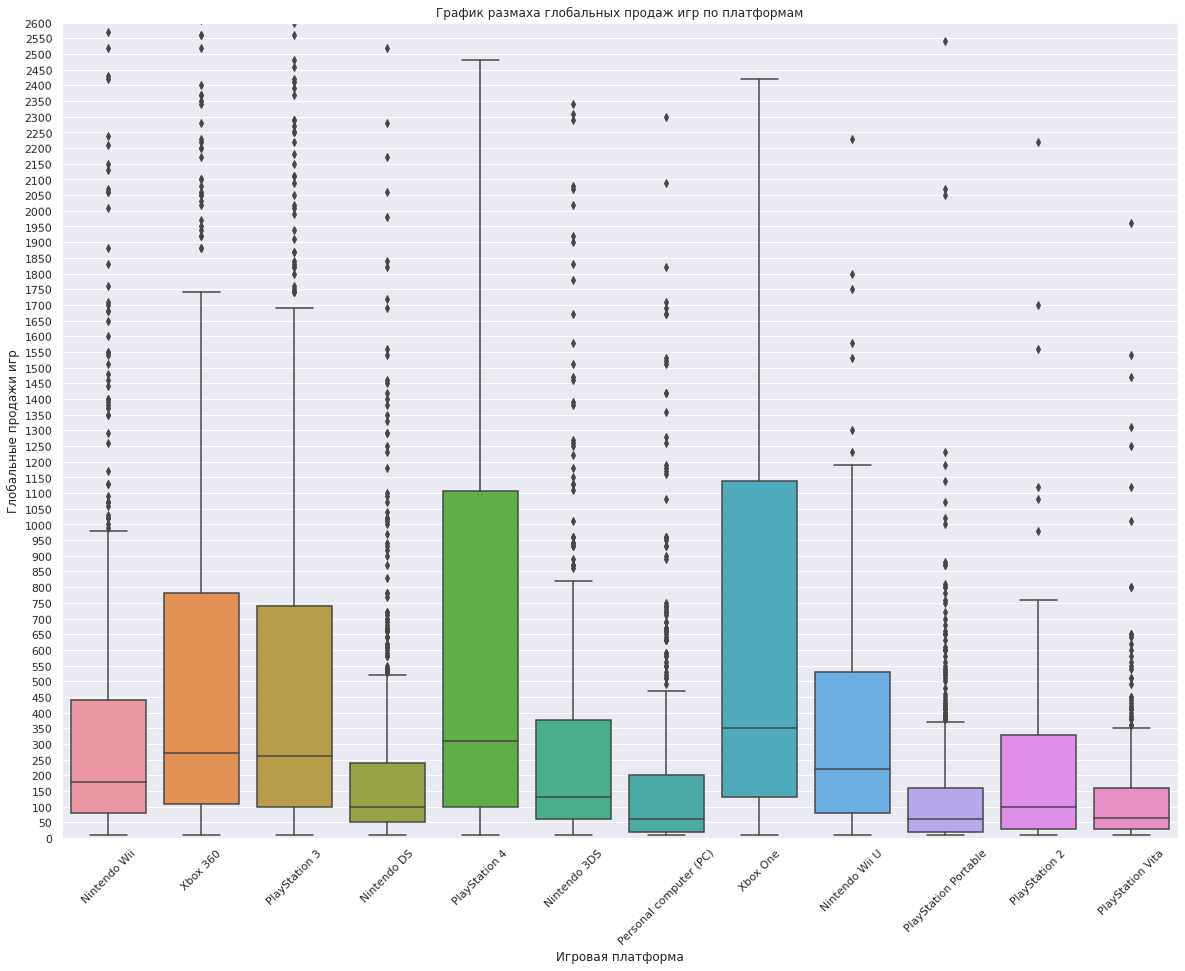

In [41]:
# Посмотрим на график размаха
plt.figure(figsize=(20,15))
sns.boxplot(data=copy_data.reset_index(), y="total_sales", x="platform")
plt.title('График размаха глобальных продаж игр по платформам')
plt.yticks(ticks=np.arange(0,2700,50), rotation=1)
plt.xticks(rotation=45)
plt.ylim(0, 2600) 
plt.xlabel('Игровая платформа')
plt.ylabel('Глобальные продажи игр')
plt.show()

In [42]:
# и на статистические показатели для каждой платформы 
copy_data.pivot_table(index='platform', values='total_sales', aggfunc=['sum', 'count', 'mean', 'median', 'max', 'min'],
                      fill_value=True).droplevel(1, axis=1).sort_values(by='median', ascending=False).reset_index()

platform       sum  count         mean  median      max  \
0                 Xbox One  133170.0    160   832.312500   350.0   7390.0   
1            PlayStation 4  244890.0    228  1074.078947   310.0  14630.0   
2                 Xbox 360  669230.0    840   796.702381   270.0  21820.0   
3            PlayStation 3  715070.0   1013   705.893386   260.0  21050.0   
4           Nintendo Wii U   77590.0    133   583.383459   220.0   7090.0   
5             Nintendo Wii  429760.0    774   555.245478   180.0  32770.0   
6             Nintendo 3DS  242670.0    466   520.751073   130.0  14600.0   
7              Nintendo DS  243290.0    910   267.351648   100.0  15130.0   
8            PlayStation 2   32490.0    141   230.425532   100.0   2220.0   
9         PlayStation Vita   49560.0    344   144.069767    65.0   1960.0   
10  Personal computer (PC)  133970.0    533   251.350844    60.0   8010.0   
11    PlayStation Portable  101830.0    661   154.054463    60.0   4870.0   

     min  
0   10.0  
1   10.0  
2   10.0  
3   10.0  
4   10.0  
5   10.0  
6   10.0  
7   10.0  
8   10.0  
9   10.0  
10  10.0  
11  10.0

Как видим за актуальный период самыми прибыльными платформами являются Xbox One и PlayStation 4, последние модели из своих семейств. Для данных платформ выпуск и продажа новых игр происходит плавнее и кол-во больше, чем для конкурентов. Правая квантиль находится на уровне 1,15 и 1,1 млн копий соответсвено, при этом правый "усик" у playstation больше. Как можно заметить, у конкурентов больше аномальных значений, единичные игры которые хорошо "зашли" игрокам, но в целом никак не отразились на общих показателях продаж для определенных консолей.

Для всех консолей идет сильное расхождение между медианной и средними значениями продаж.

Для портативных приставок от Playstation диапозон прибольности самый маленький. К ним бы можно добавить персональыне компьютеры и Nintendo DS. 

У семейства Nintendo представлено больше моделей игровых платформ. Свою прибыль они берут количественным параметром.

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.**


*Для этого сравним 4 модели по количественной наполнености оценками критиков и игроков:*
- первые две топовых по общим продажам за актуальный период времени PlayStation 3 и Xbox 360
- вторые две - новички, подающие большие надежды и являющиеся самыми прибыльным по медианому значению PlayStation 4 и Xbox One 

In [43]:
# Показатели PlayStation 3
print(copy_data.query('platform == "PlayStation 3"').info())
print('')
print('Соотношение заполненных значений к общему числу:\n')
print('critic_score:', (copy_data.loc[(copy_data['platform'] == "PlayStation 3"),
        'critic_score'].count() / copy_data.loc[(copy_data['platform'] == "PlayStation 3"), 'platform'].count()).round(3))
print('user_score:', (copy_data.loc[(copy_data['platform'] == "PlayStation 3"),
        'user_score'].count() / copy_data.loc[(copy_data['platform'] == "PlayStation 3"), 'platform'].count()).round(3))
print('rating:', (copy_data.loc[(copy_data['platform'] == "PlayStation 3"),
        'rating'].count() / copy_data.loc[(copy_data['platform'] == "PlayStation 3"), 'platform'].count()).round(3))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1013 entries, 16 to 16674
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1013 non-null   object 
 1   platform         1013 non-null   object 
 2   year_of_release  1013 non-null   int64  
 3   genre            1013 non-null   object 
 4   na_sales         1013 non-null   float64
 5   eu_sales         1013 non-null   float64
 6   jp_sales         1013 non-null   float64
 7   other_sales      1013 non-null   float64
 8   critic_score     591 non-null    float64
 9   user_score       646 non-null    float64
 10  rating           706 non-null    object 
 11  maker_platform   1013 non-null   object 
 12  total_sales      1013 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 110.8+ KB
None

Соотношение заполненных значений к общему числу:

critic_score: 0.583
user_score: 0.638
rating: 0.697


In [44]:
# Показатели Xbox 360
print(copy_data.query('platform == "Xbox 360"').info())
print('')
print('Соотношение заполненных значений к общему числу:\n')
print('critic_score:', (copy_data.loc[(copy_data['platform'] == "Xbox 360"),
        'critic_score'].count() / copy_data.loc[(copy_data['platform'] == "Xbox 360"), 'platform'].count()).round(3))
print('user_score:', (copy_data.loc[(copy_data['platform'] == "Xbox 360"),
        'user_score'].count() / copy_data.loc[(copy_data['platform'] == "Xbox 360"), 'platform'].count()).round(3))
print('rating:', (copy_data.loc[(copy_data['platform'] == "Xbox 360"),
        'rating'].count() / copy_data.loc[(copy_data['platform'] == "Xbox 360"), 'platform'].count()).round(3))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 14 to 16654
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             840 non-null    object 
 1   platform         840 non-null    object 
 2   year_of_release  840 non-null    int64  
 3   genre            840 non-null    object 
 4   na_sales         840 non-null    float64
 5   eu_sales         840 non-null    float64
 6   jp_sales         840 non-null    float64
 7   other_sales      840 non-null    float64
 8   critic_score     566 non-null    float64
 9   user_score       620 non-null    float64
 10  rating           683 non-null    object 
 11  maker_platform   840 non-null    object 
 12  total_sales      840 non-null    float64
dtypes: float64(7), int64(1), object(5)
memory usage: 91.9+ KB
None

Соотношение заполненных значений к общему числу:

critic_score: 0.674
user_score: 0.738
rating: 0.813


In [45]:
# Показатели PlayStation 4
print(copy_data.query('platform == "PlayStation 4"').info())
print('')
print('Соотношение заполненных значений к общему числу:\n')
print('critic_score:', (copy_data.loc[(copy_data['platform'] == "PlayStation 4"),
        'critic_score'].count() / copy_data.loc[(copy_data['platform'] == "PlayStation 4"), 'platform'].count()).round(3))
print('user_score:', (copy_data.loc[(copy_data['platform'] == "PlayStation 4"),
        'user_score'].count() / copy_data.loc[(copy_data['platform'] == "PlayStation 4"), 'platform'].count()).round(3))
print('rating:', (copy_data.loc[(copy_data['platform'] == "PlayStation 4"),
        'rating'].count() / copy_data.loc[(copy_data['platform'] == "PlayStation 4"), 'platform'].count()).round(3))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 31 to 16398
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             228 non-null    object 
 1   platform         228 non-null    object 
 2   year_of_release  228 non-null    int64  
 3   genre            228 non-null    object 
 4   na_sales         228 non-null    float64
 5   eu_sales         228 non-null    float64
 6   jp_sales         228 non-null    float64
 7   other_sales      228 non-null    float64
 8   critic_score     154 non-null    float64
 9   user_score       156 non-null    float64
 10  rating           152 non-null    object 
 11  maker_platform   228 non-null    object 
 12  total_sales      228 non-null    float64
dtypes: float64(7), int64(1), object(5)
memory usage: 24.9+ KB
None

Соотношение заполненных значений к общему числу:

critic_score: 0.675
user_score: 0.684
rating: 0.667


In [46]:
# Показатели Xbox One
print(copy_data.query('platform == "Xbox One"').info())
print('')
print('Соотношение заполненных значений к общему числу:\n')
print('critic_score:', (copy_data.loc[(copy_data['platform'] == "Xbox One"),
        'critic_score'].count() / copy_data.loc[(copy_data['platform'] == "Xbox One"), 'platform'].count()).round(3))
print('user_score:', (copy_data.loc[(copy_data['platform'] == "Xbox One"),
        'user_score'].count() / copy_data.loc[(copy_data['platform'] == "Xbox One"), 'platform'].count()).round(3))
print('rating:', (copy_data.loc[(copy_data['platform'] == "Xbox One"),
        'rating'].count() / copy_data.loc[(copy_data['platform'] == "Xbox One"), 'platform'].count()).round(3))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 99 to 16597
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             160 non-null    object 
 1   platform         160 non-null    object 
 2   year_of_release  160 non-null    int64  
 3   genre            160 non-null    object 
 4   na_sales         160 non-null    float64
 5   eu_sales         160 non-null    float64
 6   jp_sales         160 non-null    float64
 7   other_sales      160 non-null    float64
 8   critic_score     109 non-null    float64
 9   user_score       116 non-null    float64
 10  rating           115 non-null    object 
 11  maker_platform   160 non-null    object 
 12  total_sales      160 non-null    float64
dtypes: float64(7), int64(1), object(5)
memory usage: 17.5+ KB
None

Соотношение заполненных значений к общему числу:

critic_score: 0.681
user_score: 0.725
rating: 0.719


Самая большая выборка у PlayStation 3 - 1013 значения, но при этом отсутсвует 42% оценок экспертов.

Самая маленькая выборка у Xbox One - 160 значений.

Самой сбалансированной будет выборка у **Xbox 360**: 840 значений, оценка критиков заполнена на ~67%, оценка игроков на ~74%, рейтинг на ~82%

total_sales  critic_score  user_score
total_sales      1.000000      0.364421    0.077778
critic_score     0.364421      1.000000    0.618991
user_score       0.077778      0.618991    1.000000

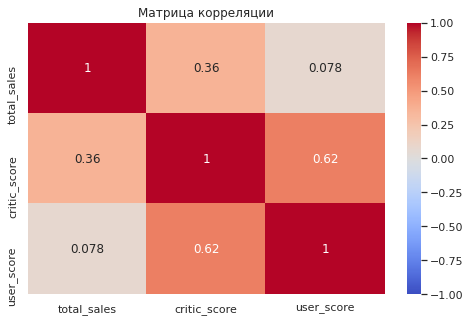

In [47]:
# Воспользуемся методом корреляции и хитмепом для Xbox 360
# Нам нужен список с параметрами для проверки: общие продажи, оценки критиков и пользователей
corr_columns = ['total_sales', 'critic_score', 'user_score']
corr_matrix = copy_data.loc[(copy_data['platform'] == "Xbox 360"), corr_columns].corr()
# выводим матрицу корреляции
display(corr_matrix)

# Визуализируем
plt.figure(figsize = (8, 5))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.title('Матрица корреляции')
plt.show()

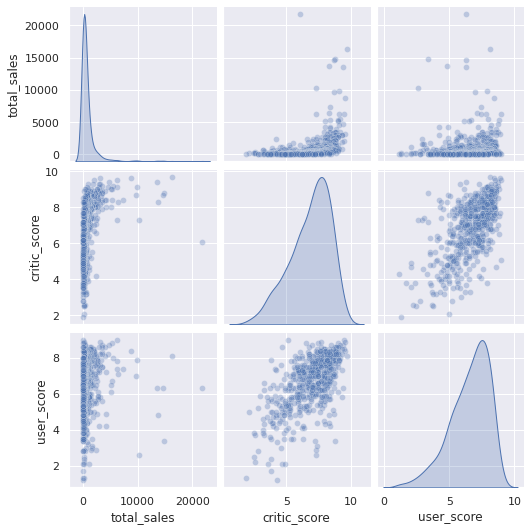

In [48]:
# Построим pair.plot для отображения зависимостей
sns.pairplot(copy_data.loc[(copy_data['platform'] == "Xbox 360"), corr_columns], diag_kind='kde', plot_kws={'alpha': 0.3})
plt.show()

Что мы видим: средняя линейная связь между продажими и оценками критиков, корреляция положительная и составляет 0,36. Зависимость прямопропорциональня, чем выше оценка критика (по графику видно, что больше 7-8), тем больше продажи для игр на платформу. А вот связь между оценками игроков и продажами малозаметны, есть выбивающиеся значения, но они не играют большой роли. Зато заметна Хорошая положительная линейная связь между оценками критиков и оценками пользователей, чем выше оценка критика, тем выше оценка и пользователя.

**Соотнесем полученные выводы с продажами игр и на другие платформы**

In [49]:
# Для наглядности быстро пробежимся по корреляциям оставшихся, нестоль заполненых по оценкам, платформ
# оставляем колонки
corr_columns = ['total_sales', 'critic_score', 'user_score']
# PlayStation 3
display('PlayStation 3:', copy_data.loc[(copy_data['platform'] == "PlayStation 3"), corr_columns].corr())
print('')
# PlayStation 4
display('PlayStation 4:', copy_data.loc[(copy_data['platform'] == "PlayStation 4"), corr_columns].corr())
print('')
# Xbox One
display('Xbox One:', copy_data.loc[(copy_data['platform'] == "Xbox One"), corr_columns].corr())

'PlayStation 3:'

total_sales  critic_score  user_score
total_sales      1.000000      0.417976    0.089375
critic_score     0.417976      1.000000    0.634093
user_score       0.089375      0.634093    1.000000

'PlayStation 4:'

total_sales  critic_score  user_score
total_sales      1.000000      0.431848    0.024231
critic_score     0.431848      1.000000    0.612451
user_score       0.024231      0.612451    1.000000

'Xbox One:'

total_sales  critic_score  user_score
total_sales      1.000000      0.459385   -0.039268
critic_score     0.459385      1.000000    0.499502
user_score      -0.039268      0.499502    1.000000

Вспомнив ранее посчитанный "ящик с усами" и посмотрев на полученные корреляции, на которых зависимость от оценок в целом сопоставима с Xbox 360 (да, корреляция по оценкам критиков повыше, но сошлемся на больше пропущенных значений в выборке) можно сделать вывод:
- Выпуск игр и продажи в целом более высоки в момент выхода приставки на продажу и ближайшие 2-3 года
- Выпуск игр и продажи выше у стационарных консолей
- Оценка критиков влияет на продажи

**Посмотрим на общее распределение игр по жанрам.**

*Подумаем, что можно сказать о самых прибыльных жанрах и выделяются ли жанры с высокими и низкими продажами.*

genre       sum  count         mean  median
0         Action  781020.0   1590   491.207547   170.0
1        Shooter  510810.0    453  1127.615894   370.0
2         Sports  442270.0    710   622.915493   200.0
3   Role-Playing  344410.0    617   558.200972   160.0
4           Misc  307770.0    750   410.360000   145.0
5       Platform  157020.0    167   940.239521   240.0
6         Racing  153630.0    298   515.536913   170.0
7       Fighting  109020.0    236   461.949153   200.0
8     Simulation  102780.0    322   319.192547   110.0
9      Adventure   77410.0    647   119.644513    40.0
10      Strategy   47000.0    221   212.669683    70.0
11        Puzzle   40380.0    192   210.312500    80.0

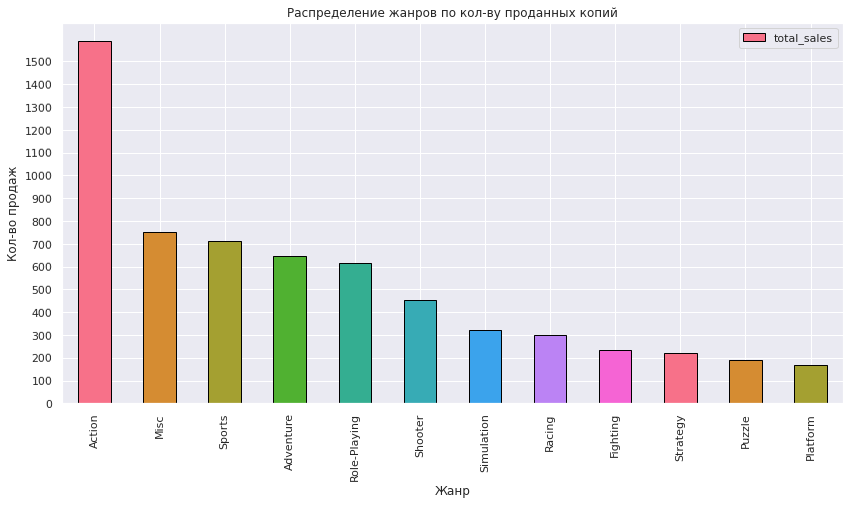

In [50]:
# Посмотрим на сводную таблицу по жанрам
display(copy_data.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count', 'mean', 'median'],
                      fill_value=True).droplevel(1, axis=1).sort_values(by='sum', ascending=False).reset_index())

# посмотрим Распределение жанров по кол-ву проданных копий, используя за показатель count()
colors = sns.color_palette("husl", 9)
copy_data.groupby(['genre']).count().sort_values(by='total_sales', ascending=False).plot(kind='bar',
                    y='total_sales', figsize=(14, 7), grid=True, color=colors, ec='black')
plt.title('Распределение жанров по кол-ву проданных копий')
plt.xlabel('Жанр')
plt.ylabel('Кол-во продаж')
plt.yticks(ticks=np.arange(0,1600,100), rotation=1)
plt.show()


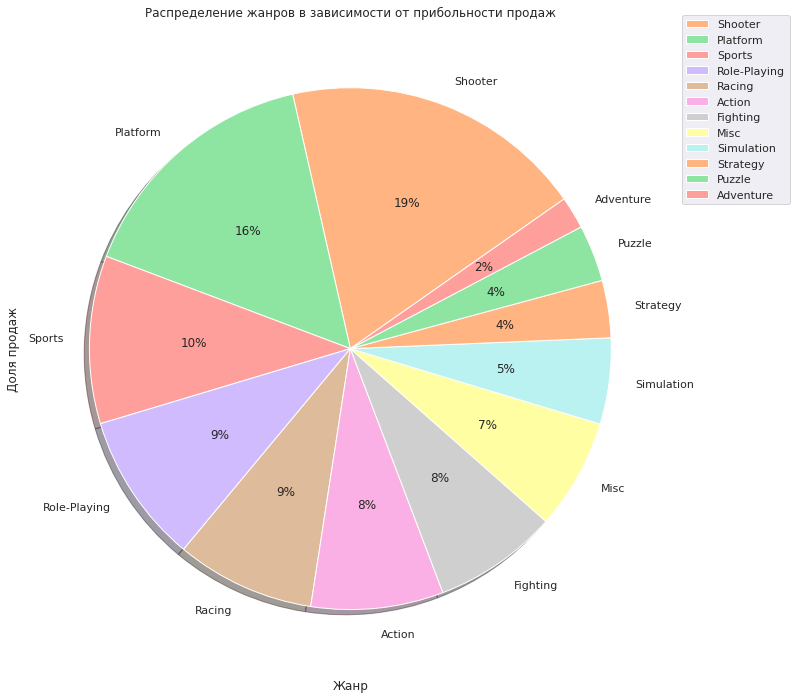

In [51]:
#  и построим круговой график для распределение жанров в зависимости от прибольности продаж,
# использую за показатель продаж медиану
colors = sns.color_palette('pastel')[1:15]
copy_data.groupby(['genre']).mean().sort_values(by='total_sales', ascending=False).plot(kind='pie',
                    y='total_sales', figsize=(12, 12), autopct='%1.0f%%', colors=colors, shadow=True, startangle=35)
plt.title('Распределение жанров в зависимости от прибольности продаж')
plt.xlabel('Жанр')
plt.ylabel('Доля продаж')
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

Уверенным лидером среди количества продаж является жанр "Action" - 1590 игр с таким жанром, 2 и 3 место разделили "Misc" - 750 игр и "Sports" с 710 играми, меньше всего продаются игры в жанрах "Puzzle" и "Platform" (192 и 167 игры соответсвенно).

Самыми прибыльными жанрами являются: 
- Shooter, 19% рынка
- Platform, 15% рынка
- Sports, 10%
- и четвертое место между собой делят: Role-Playing и Racing с долей в 9% от рынка
    
"Неудачными" в плане продаж являются Adventure, Strategy и Puzzle.

### Составим портрет пользователя каждого региона

**Определим для пользователя каждого региона (NA, EU, JP):**
- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)
- Влияние рейтинга ESRB на продажи в отдельном регионе

In [52]:
# Посмотрим на общее кол-во записей для датафрейма, где продажи в определенном регионе больше нуля
print('Северная америка: ', copy_data.query('na_sales > 0')['platform'].value_counts().sum())
print('')
print('Европа: ', copy_data.query('eu_sales > 0')['platform'].value_counts().sum())
print('')
print('Япония: ', copy_data.query('jp_sales > 0')['platform'].value_counts().sum())

Северная америка:  4082

Европа:  3768

Япония:  2644


***Игровые платформы***

In [53]:
# Посмотрим на табличное распределение и выведим топ-5
# сделаем сводную таблицу для Америке по кол-ву игр и их суммарным продажам в разбиве по платформам
na_platform = copy_data.query('na_sales > 0').pivot_table(index='platform', values='na_sales',
                                aggfunc=['sum', 'count']).droplevel(1, axis=1).sort_values('sum', ascending=False).reset_index()
display('Северная Америка:', na_platform)
print('')

# сделаем сводную таблицу для Европы по кол-ву игр и их суммарным продажам в разбиве по платформам
eu_platform = copy_data.query('eu_sales > 0').pivot_table(index='platform', values='eu_sales',
                                aggfunc=['sum', 'count']).droplevel(1, axis=1).sort_values('sum', ascending=False).reset_index()
display('Европа:', eu_platform)
print('')

# сделаем сводную таблицу для Японии по кол-ву игр и их суммарным продажам в разбиве по платформам
jp_platform = copy_data.query('jp_sales > 0').pivot_table(index='platform', values='jp_sales',
                                aggfunc=['sum', 'count']).droplevel(1, axis=1).sort_values('sum', ascending=False).reset_index()
display('Япония:', jp_platform)

'Северная Америка:'

platform       sum  count
0                 Xbox 360  407490.0    744
1            PlayStation 3  291230.0    748
2             Nintendo Wii  235690.0    658
3              Nintendo DS  120610.0    636
4            PlayStation 4   87250.0    180
5                 Xbox One   78850.0    148
6             Nintendo 3DS   78510.0    241
7   Personal computer (PC)   39190.0    241
8           Nintendo Wii U   36000.0    111
9     PlayStation Portable   22270.0    166
10        PlayStation Vita   12320.0    131
11           PlayStation 2   11680.0     78

'Европа:'

platform       sum  count
0            PlayStation 3  253740.0    732
1                 Xbox 360  196050.0    682
2             Nintendo Wii  124110.0    459
3            PlayStation 4  109310.0    194
4   Personal computer (PC)   79040.0    495
5             Nintendo 3DS   58940.0    235
6              Nintendo DS   53890.0    378
7                 Xbox One   41960.0    155
8           Nintendo Wii U   23650.0    111
9     PlayStation Portable   18240.0    119
10        PlayStation Vita   12680.0    129
11           PlayStation 2    6610.0     79

'Япония:'

platform      sum  count
0           Nintendo 3DS  92590.0    319
1          PlayStation 3  66990.0    566
2            Nintendo DS  52110.0    266
3   PlayStation Portable  50390.0    558
4           Nintendo Wii  34320.0    123
5       PlayStation Vita  18280.0    284
6         Nintendo Wii U  12340.0     60
7          PlayStation 4  10220.0    139
8               Xbox 360   7410.0    247
9          PlayStation 2   2740.0     61
10              Xbox One    330.0     21

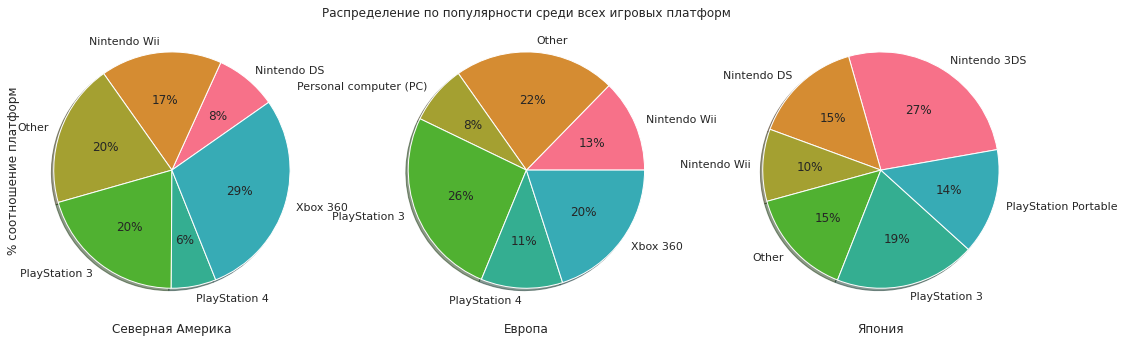

In [54]:
# Посмотрим долевое распределение среди всех игровых платформ, выделив отдельно только первые 5
fig, axes = plt.subplots(1,3)
axes[1].set_title('Распределение по популярности среди всех игровых платформ')
axes[0].set_xlabel('Северная Америка')
axes[1].set_xlabel('Европа')
axes[2].set_xlabel('Япония')
colors = sns.color_palette("husl", 9)

# выделим первые 5 платформ, остальные добавим в группу "other" для отображения на графике
na_platform['platform'] = na_platform['platform'].where(na_platform['sum'].isin(na_platform['sum'].nlargest(5)), 'Other')
na_platform.groupby(['platform']).sum().plot(ax=axes[0], legend=False, ylabel='% соотношение платформ', startangle=35,
                kind='pie', y='sum', autopct='%1.0f%%', colors=colors, shadow=True)

eu_platform['platform'] = eu_platform['platform'].where(eu_platform['sum'].isin(eu_platform['sum'].nlargest(5)), 'Other')
eu_platform.groupby(['platform']).sum().plot(ax=axes[1], legend=False, ylabel='',
                kind='pie', y='sum', autopct='%1.0f%%', colors=colors, shadow=True)

jp_platform['platform'] = jp_platform['platform'].where(jp_platform['sum'].isin(jp_platform['sum'].nlargest(5)), 'Other')
jp_platform.groupby(['platform']).sum().plot(ax=axes[2], legend=False, startangle=10, ylabel='',
                kind='pie', y='sum', autopct='%1.0f%%', colors=colors, shadow=True)
plt.show()

***Распределение платформ по популярности в каждом регионе***

*Самой популярной игровой платформой является:*
- для Северной Америки - Xbox 360, доля рынка составялет 29% (возможно связано с тем, что Разработчик Microsoft, а у американцев развито чувство патриотизма)
- для Европы - PlayStation 3, доля рынка 26% (удобная стационарная консоль)
- для Японии - Nintendo 3DS, с долей в 27% (японцы занятой народ, много работают и долго добираются до работы, портативная коносль лучшее решение, что бы разбавить дорогу)

*на втором месте:*
- PlayStation 3 с долей рынка 20% в Северной Америке
- Xbox 360 в Европе, доля рынка 20%
- PlayStation 3 в Японии, доля рынка 19%

*третье место:*
- Nintendo Wii с показателями рынка: 17% в Северной Америке, 13% в Европе 
- Nintendo DS в Японии, доля рынка 15%

*четвертое место:*
- Северная Америка - Nintendo DS, доля рынка 8%
- Европа - PlayStation 4, доля рынка 11%
- Япония - PlayStation Portable, доля рынка 14% (и снова портативная консоль)

*пятое место:*
- для Северной Америки это PlayStation 4, с долей в 6%
- для Европы Personal computer (PC), с долей в 8%
- для Японии это Nintendo Wii, доля 10%

Остальные приставки занимают для рынка Северной Америки 20%, для Европы 8%, для Японии 15% 

***Популярные жанры***

In [55]:
# Посмотрим на табличное распределение и выведим топ-5 уже по жанрам
# сделаем сводную таблицу для Америке по кол-ву игр и их суммарным продажам в разбиве по платформам
na_genre = copy_data.query('na_sales > 0').pivot_table(index='genre', values='na_sales',
                                aggfunc=['sum', 'count']).droplevel(1, axis=1).sort_values('sum', ascending=False).reset_index()
display('Северная Америка:', na_genre)
print('')

# сделаем сводную таблицу для Европы по кол-ву игр и их суммарным продажам в разбиве по платформам
eu_genre = copy_data.query('eu_sales > 0').pivot_table(index='genre', values='eu_sales',
                                aggfunc=['sum', 'count']).droplevel(1, axis=1).sort_values('sum', ascending=False).reset_index()
display('Европа:', eu_genre)
print('')

# сделаем сводную таблицу для Японии по кол-ву игр и их суммарным продажам в разбиве по платформам
jp_genre = copy_data.query('jp_sales > 0').pivot_table(index='genre', values='jp_sales',
                                aggfunc=['sum', 'count']).droplevel(1, axis=1).sort_values('sum', ascending=False).reset_index()
display('Япония:', jp_genre)

'Северная Америка:'

genre       sum  count
0         Action  352490.0   1087
1        Shooter  260130.0    401
2         Sports  220120.0    529
3           Misc  163640.0    512
4   Role-Playing  124940.0    334
5       Platform   73640.0    147
6         Racing   60310.0    245
7       Fighting   54720.0    169
8     Simulation   43580.0    235
9      Adventure   29740.0    201
10        Puzzle   20190.0    131
11      Strategy   17590.0     91

'Европа:'

genre       sum  count
0         Action  261480.0   1108
1        Shooter  176400.0    382
2         Sports  146500.0    444
3           Misc   85610.0    405
4   Role-Playing   79280.0    310
5         Racing   65900.0    234
6       Platform   48290.0    135
7     Simulation   36630.0    163
8       Fighting   26400.0    152
9      Adventure   23000.0    209
10      Strategy   16720.0    125
11        Puzzle   12010.0    101

'Япония:'

genre       sum  count
0   Role-Playing  114000.0    494
1         Action   77090.0    716
2           Misc   29050.0    198
3         Sports   24400.0    177
4       Platform   20540.0     57
5      Adventure   17840.0    419
6       Fighting   16170.0    152
7        Shooter   14100.0    178
8     Simulation   13920.0     70
9       Strategy    8390.0     91
10        Racing    7170.0     59
11        Puzzle    5050.0     33

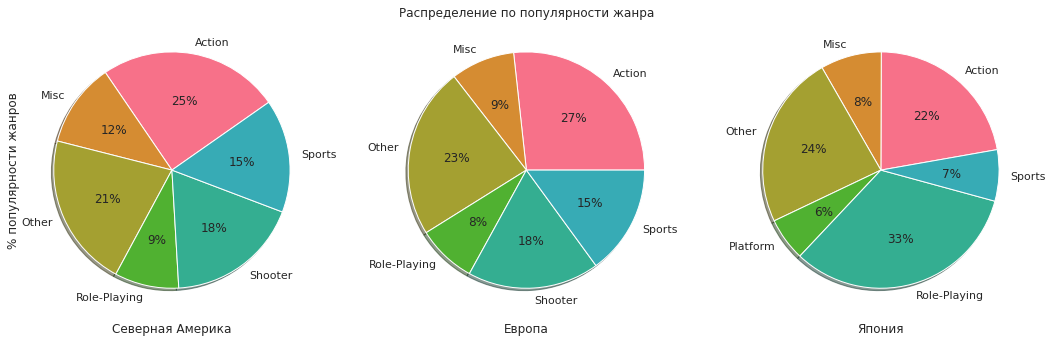

In [56]:
# Посмотрим долевое распределение среди всех жанров, выделив отдельно только первые 5
fig, axes = plt.subplots(1,3)
axes[1].set_title('Распределение по популярности жанра')
axes[0].set_xlabel('Северная Америка')
axes[1].set_xlabel('Европа')
axes[2].set_xlabel('Япония')
colors = sns.color_palette("husl", 9)

# выделим первые 5 жанра, остальные добавим в группу "other" для отображения на графике
na_genre['genre'] = na_genre['genre'].where(na_genre['sum'].isin(na_genre['sum'].nlargest(5)), 'Other')
na_genre.groupby(['genre']).sum().plot(ax=axes[0], legend=False, ylabel='% популярности жанров', startangle=35,
                kind='pie', y='sum', autopct='%1.0f%%', colors=colors, shadow=True)

eu_genre['genre'] = eu_genre['genre'].where(eu_genre['sum'].isin(eu_genre['sum'].nlargest(5)), 'Other')
eu_genre.groupby(['genre']).sum().plot(ax=axes[1], legend=False, ylabel='',
                kind='pie', y='sum', autopct='%1.0f%%', colors=colors, shadow=True)

jp_genre['genre'] = jp_genre['genre'].where(jp_genre['sum'].isin(jp_genre['sum'].nlargest(5)), 'Other')
jp_genre.groupby(['genre']).sum().plot(ax=axes[2], legend=False, startangle=10, ylabel='',
                kind='pie', y='sum', autopct='%1.0f%%', colors=colors, shadow=True)
plt.show()

*По жанровому предпочтению Северная Америка и Европа очень схожи, самые популярные жанры: Action, Shooter, Sports,	Misc, Role-Playing.*

Экшен или боевик — жанр компьютерных игр, в котором делается упор на эксплуатацию физических возможностей игрока, в том числе координации глаз и рук и скорости реакции. Шутер, в плане эксплуатацию физических возможностей игрока, очень похож на экшн, не удивительно, что он на втором месте. Таким образом американцы и европейцы предпочитают жанр игр, который не занимает много времени, но при этом физически в игру погружаешься полностью.

*В Японии: Role-Playing, Action, Misc, Sports, Platform*

Японцы предпочитают ролевые игры, как онлайн, так и оффлайн, возможно это связано с тем, что в таких играх игрок "проживает" жизнь другого персонажа, развивают его, отвлекает от будничной рабочей суеты

***Влияние рейтинга ESRB на продажи***

In [57]:
# Посмотрим на табличное распределение и выведим топ-5 уже по жанрам
# сделаем сводную таблицу для Америке по кол-ву игр и их суммарным продажам в разбиве по платформам
na_rating = copy_data.query('na_sales > 0').pivot_table(index='rating', values='na_sales',
                                aggfunc=['sum', 'count']).droplevel(1, axis=1).sort_values('sum', ascending=False).reset_index()
display('Северная Америка:', na_rating)
print('')

# сделаем сводную таблицу для Европы по кол-ву игр и их суммарным продажам в разбиве по платформам
eu_rating = copy_data.query('eu_sales > 0').pivot_table(index='rating', values='eu_sales',
                                aggfunc=['sum', 'count']).droplevel(1, axis=1).sort_values('sum', ascending=False).reset_index()
display('Европа:', eu_rating)
print('')

# сделаем сводную таблицу для Японии по кол-ву игр и их суммарным продажам в разбиве по платформам
jp_rating = copy_data.query('jp_sales > 0').pivot_table(index='rating', values='jp_sales',
                                aggfunc=['sum', 'count']).droplevel(1, axis=1).sort_values('sum', ascending=False).reset_index()
display('Япония:', jp_rating)

'Северная Америка:'

rating       sum  count
0      M  425250.0    692
1      E  395190.0   1178
2      T  218160.0    851
3   E10+  199130.0    685
4     EC    1320.0      6

'Европа:'

rating       sum  count
0      M  310210.0    726
1      E  247890.0    841
2      T  143490.0    798
3   E10+  117820.0    591
4     RP      30.0      1

'Япония:'

rating      sum  count
0      E  60420.0    201
1      T  48320.0    390
2      M  34430.0    372
3   E10+  20370.0    124

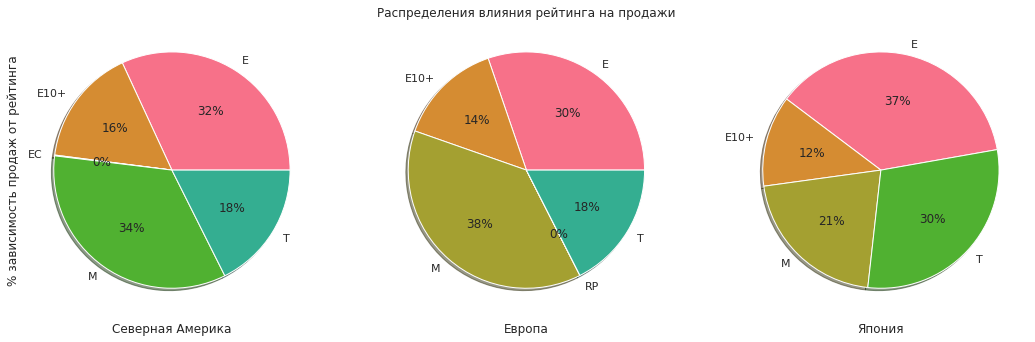

In [58]:
# Посмотрим долевое распределения влияние рейтинга на продажи
fig, axes = plt.subplots(1,3)
axes[1].set_title('Распределения влияния рейтинга на продажи')
axes[0].set_xlabel('Северная Америка')
axes[1].set_xlabel('Европа')
axes[2].set_xlabel('Япония')
colors = sns.color_palette("husl", 9)

na_rating.groupby(['rating']).sum().plot(ax=axes[0], legend=False, ylabel='% зависимость продаж от рейтинга',
                kind='pie', y='sum', autopct='%1.0f%%', colors=colors, shadow=True)

eu_rating.groupby(['rating']).sum().plot(ax=axes[1], legend=False, ylabel='',
                kind='pie', y='sum', autopct='%1.0f%%', colors=colors, shadow=True)

jp_rating.groupby(['rating']).sum().plot(ax=axes[2], legend=False, startangle=10, ylabel='',
                kind='pie', y='sum', autopct='%1.0f%%', colors=colors, shadow=True)
plt.show()

*В Северной Америке и Европе больше всего продаж идет на игры с рейтингом М (34% и 38% рынка соответсвенно) - «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.*

*Дальше по популярности «E» («Для всех»: Содержание вполне подходит для всех возрастов) по 32% для Америки и 30% для Европы
Е и Т.*

*Рейтинги ЕС и RP - единичные случаи*


*В Японии преобладают рейтинг Е (37%) и Т (30%) («Подросткам»: Игра подходит для лиц от 13 лет.)*

Таким образом можно сделать выводы, что в Северной Америке и Европе основная играющая категория людей это взрослые люди, а в Японии - подрости.

**Вывод:**

Потенциальный покупатель для Северной Америке, молодой человек возрастом 17+ лет, предпочитающий играть дома в жанре экшн для игровой консоли Xbox 360

Для Европы картина схожа, только предпочтительная игровая приставка PlayStation 3.

Клиент в Японии: подросток, любящий ролевые игры во время дороги на учебу, так как предпочитает портативную приставку Nintendo 3DS.

### Проверка гипотез

***Первая гипотеза***

**Гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Посчитаем среднее, дисперсию и стандартное отклонение для игровой платформы Xbox One и персонального компьютера PC в течение нашего актуального периода.

In [59]:
# Выводим для Xbox 360
print('Xbox 360:')
display(copy_data.query('(platform == "Xbox 360")').pivot_table(index='platform', values='user_score',
                aggfunc=['count', 'mean', np.var, np.std]).droplevel(1, axis=1))
print('')

# Выводим для Personal computer (PC)
print('Personal computer (PC):')
display(copy_data.query('platform == "Personal computer (PC)"').pivot_table(index='platform', values='user_score',
                aggfunc=['count', 'mean', np.var, np.std]).droplevel(1, axis=1))

Xbox 360:


count     mean      var       std
platform                                   
Xbox 360    620  6.53629  2.24839  1.499463


Personal computer (PC):


count      mean       var      std
platform                                                  
Personal computer (PC)    413  6.695157  2.337015  1.52873

Выборка для Xbox 360 в 1,5 раза больше, при этом средняя, дисперсия и стандартный разброс весьма близки друг к другу.

   
Проверяем гипотезу. 
- Нулевая гипотеза H0 - Средние пользовательские рейтинги платформ Xbox One и PC `равны`.
- Альтернативная гипотеза H1 - Средние пользовательские рейтинги платформ Xbox One и PC `различаются`.

Метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам:

**scipy.stats.ttest_ind(array1, array2, equal_var, alternative)**, equal_var - параметр, задающий считать ли равными дисперсии выборок. Передаётся как "equal_var = True" или "equal_var = False" (True — считать, False — не считать). Хоть количественная выборка у нас разная, но дисперсия в них одинаковая, так что зададем True. *alternative* — текстовый параметр, задающий альтернативную гипотезу: 'two-sided', 'less', 'greater' (соответственно, двусторонняя, левосторонняя и правосторонняя H1). В нашем случае 'two-sided', т.к. двусторонняя гипотеза.

Так как общепринятые пороговые значения — 5 % и 1 %, мы будем их придерживаться и значение альфа зададим равной 1% (для более точных выводов) `alpha = 0.01`
    

In [60]:
# высчитываем средние пользовательские рейтинги
xbox_ttest = copy_data[(copy_data['platform'] == "Xbox 360") & (copy_data['user_score'].notna())]['user_score']
pc_ttest = copy_data[(copy_data['platform'] == "Personal computer (PC)") & (copy_data['user_score'].notna())]['user_score']

# задаём уровень значимости
alpha = 0.01

# проводим ttest для двух выборок, в качестве альтернативной используем двустороннюю гипотезу
results = st.ttest_ind(xbox_ttest, pc_ttest, equal_var=True, alternative='two-sided')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.09820797780829962
Нет оснований отвергнуть нулевую гипотезу


В зависимости от уровня статистической значимости мы можем отвергнуть или нет нулевую гипотезу. Р-value ~ 0,098, следовательно при альфе больше 10% нулевую гипотезу можно отвергнуть. Но так как общепринятые пороговые значения альфы — 5 % и 1 %, мы будем придерживаться заданного 1% порога. Таким образом:

Так как значение p-value чуть меньше 1%, то у нас нет оснований отвергать нулевую гипотезу и мы можем предположить, что средние пользовательские рейтинги платформ Xbox One и PC равны.

***Вторая гипотеза***

**Гипотеза:** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Посчитаем среднее, дисперсию и стандартное отклонение для жанров Action и Sports в течение нашего актуального периода.

In [61]:
# Выводим для Action
print('Action:')
display(copy_data.query('(genre == "Action")').pivot_table(index='genre', values='user_score',
                aggfunc=['count', 'mean', np.var, np.std]).droplevel(1, axis=1))
print('')

# Выводим для Sports
print('Sports:')
display(copy_data.query('genre == "Sports"').pivot_table(index='genre', values='user_score',
                aggfunc=['count', 'mean', np.var, np.std]).droplevel(1, axis=1))

Action:


count      mean      var       std
genre                                     
Action    852  6.837207  1.81315  1.346533


Sports:


count      mean       var       std
genre                                      
Sports    363  6.173829  2.712877  1.647081

Характеристика разброса случайных величин у "Sports" больше в 1,5 раза, чем у Action, можем сослаться на маленькую выборку. 852 (Action) против 363 (Sports).

Проверяем гипотезу. 
- Нулевая гипотеза H0 - Средние пользовательские рейтинги жанров Action и Sports равны.
- Альтернативная гипотеза H1 - Средние пользовательские рейтинги жанров Action и Sports разные.

Как и в первой гипотезе тут метод о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, с тем исключением, что из-за разной дисперсии в аргументе `equal_var` мы будем применять `False`.

alpha = 0.01

In [62]:
# высчитываем средние пользовательские рейтинги
action_ttest = copy_data[(copy_data['genre'] == "Action") & (copy_data['user_score'].notna())]['user_score']
sports_ttest = copy_data[(copy_data['genre'] == "Sports") & (copy_data['user_score'].notna())]['user_score']

# задаём уровень значимости
alpha = 0.01

# проводим ttest для двух выборок, в качестве альтернативной используем двустороннюю гипотезу
results = st.ttest_ind(action_ttest, sports_ttest, equal_var=False, alternative='two-sided')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 3.1726549521751236e-11
Отвергаем нулевую гипотезу


Значение p-value значительно меньше 1%, поэтому мы можем отвергнуть нулевую гипотезу и предположить, что средние пользовательские рейтинги жанров Action и Sports разные

**Вывод:**

Подтвердить гипотезу на основе экспериментальных данных нельзя — это фундаментальное ограничение. Всё, что мы можем сделать по итогам проверки, — это отвергнуть гипотезу или нет. Иными словами, при условии, что гипотеза верна, данные могут лишь не противоречить ей или, наоборот, показывать очень маловероятные результаты. Но и в том, и в другом случае нет оснований утверждать, что выдвинутая гипотеза доказана, если данные гипотезе не противоречат, тогда мы её не отвергаем. Если же мы приходим к выводу, что вероятность получить такие данные очень низка, появляется основание отвергнуть эту гипотезу.

Проверка гипотез начинается с формулировки нулевой гипотезы H₀. Нулевую гипотезу принято формулировать как равенство (равно/ не равно). В дополнение к H₀ формулируется альтернативная гипотеза H1. Это утверждение, которое принимается верным, если отвергается H₀.

В наших случаях альтернативная гипотеза была двусторонней, потому что она предполагала возможное отклонение и в большую, и в меньшую стороны.

Мы сравнива средние двух генеральных совокупностей между собой, в одном случае это генеральная совокупность по платформе Xbox One и генеральная совокупность персонального компьютера, в другом жанров Action и Sports.

Когда сравнивают средние двух генеральных совокупностей, нулевую гипотезу можно сформулировать так: «средние значения совокупностей равны/ не равны».

Метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам мы описали выше, хочется добавить только то, чтобы понять, можно ли применять t-тест, нужно проверить три условия:
- Генеральные совокупности не зависят друг от друга..
- Выборочные средние нормально распределены. Это условие не должно быть препятствием благодаря ЦПТ. Если размер выборки составляет хотя бы несколько десятков значений, то выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены близко к нормальному вокруг истинного среднего этой совокупности. Это так, даже если сама генеральная совокупность не распределена нормально.
- Дисперсии рассматриваемых генеральных совокупностей равны. Если дисперсии у совокупностей не одинаковые, можно указать параметр `equal_var` как `False`, и тест посчитает дисперсии выборок по отдельности.

Мы проверили гипотезы и можем предположить следующий вывод: 
- средний пользовательский рейтинг платформ Xbox One не равен рейтингу PC.
- средние пользовательские рейтинги жанров Action и Sports разные

### Общий вывод

Мы проанализировали и обработали датафрейм в 16715 строк. Актуаплизировали название столбцов. Удалили данные, которые невозможно восстановить, около 1,5% от общего объема, и индифицировали некорректно заполненые данные или данные с пропущенными значениями. Разобрались с аббревиатурой 'tbd' в столбце "оценка пользователя", которая означает, что рейтинг будет определен позднее. Избавились от неявных дубликатах в рейтингах игры по системе ESRB (Entertainment Software Rating Board)(к примеру в столбце рейтинга они возникли из-за того, что рейтинг "К-А" был присвоин играм до того, как произошло объединение рейтингов с "Е"). Заполнили пропуски в столбце "год релиза игры" по выведеным нами закономерностям и общедоступным информациям. Преобразовали типы данных там, где это необходимо. Посчитали суммарные продажи по всем регионам.

Выяснили, что: самое большое кол-во игр в год выпускалось с 2002 года по 2012, пик реализации игр с 2008 по 2009 год. Рынок ПК игр представлен в сравнение с платформенными играми весьма скудно. Огромное кол-во игр выпускалось для PlayStation и Nintendo. Игры для PlayStation хорошо выпускались с 1999 года по 2016, а у игр был очень резкий старт с 2005 до 2008 года, и такое же резкое падение с 2008 по 2014 года. Игры на Хbox появились с 2000 годов и стабильно увеличивали выпуск игр до 2011 года. Выявили топ самых продаваемых платформ с их закономерностями (более детальные рассуждения мы описали по ходу исследования). Выяснили, что новые консоли появляются в течение 5-6 лет, а актуальность консолей в диапозоне от 5 до 10 лет, в зависимости от производителя (Nintendo ~ 5 лет, Xbox ~ 8-10, PlayStation ~ 6 лет) (детальные выводы мы приводили в соотвествующем разделе анализа). Определили актуальный период выпуска и продажи игр, для построения прогноза на 2017 год: *c 2009 по 2015 год*. Ссылаясь на то, что к ранее выделеным факторам актуального периода добавились следующие: на рынке остаются только актуальные версии Xbox One и Xbox 360, которые показывают равномерные продажи, идет смена поколений PlayStation на 3 и 4 серию, с 2008 года начинается спад игр для приставок Nintendo и к 2012 году показатели сравниваются с показателями Xbox, рост числа игр для персональных компьютеров, прекращение эры "ретро" консолей, спад выпуска игр для портативных консолей. Выяснили, что платформы PlayStation 4 и Xbox One бестселлеры будующих годов (подробные рассуждения причин описаны в анализе платформ). Пришли к выводу, что выпуск игр и продажи в целом более высоки в момент выхода приставки на продажу и ближайшие 2-3 года, выпуск игр и продажи выше у стационарных консолей, оценка критиков влияет на продажи. Самыми прибыльными жанрами являются Action, Shooter, Sports, и Role-Playing.

Выявили закономерности и предпочтения для каждого региона (вкусовые предпочтения у Северной Америки и стран Европы весьма близки) и составили потенциальный портрет пользователя (детальное описание и анализ по региону реализации игр находится в разделе исследования региона): для Северной Америке, молодой человек возрастом 17+ лет, предпочитающий играть дома в жанре экшн для игровой консоли Xbox 360. Для Европы картина пппохожа, только предпочтительная игровая приставка PlayStation 3. Клиент в Японии: подросток, любящий ролевые игры во время дороги на учебу, так как предпочитает портативную приставку Nintendo 3DS.

Мы проверили гипотезы методом о равенстве среднего двух генеральных совокупностей по взятым из них выборкам и смогли предположить, что средний пользовательский рейтинг платформ Xbox One отличается от рейтинга PC, а  так же, что средние пользовательские рейтинги жанров Action и Sports разные. 

Из полученных данных мы можем составить прогноз на 2017 год. Конечно для более детальной аналитики, нам не хватало параметров, которые более глубоко помогли бы понять вкусовые предпочтения клиентов (к примеру гендер пользователя, возраст (не только данные из ретинга игр, они более "размыты"), продолжительность игровой сессии, "удержание" пользователя в игре, урвоень оттока пользователей и т.д.)